# Librairies & Database Scheme

In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 2.2 MB/s 
     |████████████████████████████████| 1.1 MB 15.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=9f4758709416f5227d5a86f194fb6bbff52dacd1cd2a0bb6eec0293af2a3764f
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=94cb3a1612e66de8824af05f0261b5f49472985f636b6308cc62f10ef9612126
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8b4be1ad6d21bf5019235c2eff65928
Successfully built umap-learn pynndescent


In [ ]:
pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 10.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340655 sha256=2deda5c21e1bd73007154c23a659b35e3e01b6948e72918283c1bdc1acf7478d
  Stored in directory: /root/.cache/pip/wheels/93/78/2e/03ee191669a772e9653260aa3bd53e0b1a768751a9676e8c82
Successfully built hdbscan


In [ ]:
### Mandatory
import pandas as pd
import numpy as np
import datetime as dt


### Plotting
import missingno as mn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px

### Collab and options
from google.colab import drive
import sys
drive.mount('/content/gdrive')
pd. set_option('display.max_rows', 500)
pd. set_option('display.max_columns', 500)
np.set_printoptions(threshold=sys.maxsize)
import warnings
warnings.filterwarnings('ignore')


### Sklearn

##Preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler

##Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import umap
import hdbscan

##Metrics
from sklearn.metrics import silhouette_samples, silhouette_score,make_scorer, adjusted_rand_score

##Model selection
from sklearn.model_selection import RandomizedSearchCV

###Pipeline
from sklearn.pipeline import make_pipeline

Mounted at /content/gdrive


This is the database scheme
![Image in a markdown cell]( https://i.imgur.com/HRhd2Y0.png)

# Importing Files

In [ ]:
cust=pd.read_csv("/content/gdrive/MyDrive/Dataset_P5/olist_customers_dataset.csv", sep=',')
print("Customer Dataset Columns :\n", cust.columns, "\nShape :", cust.shape, "\nDuplicated ?", cust.duplicated().sum(), "\n \n")

geo=pd.read_csv("/content/gdrive/MyDrive/Dataset_P5/olist_geolocation_dataset.csv", sep=',')
print("Geolocation Dataset Columns :\n", geo.columns, "\nShape :", geo.shape, "\nDuplicated ?", geo.duplicated().sum(), "\n \n")

oi=pd.read_csv("/content/gdrive/MyDrive/Dataset_P5/olist_order_items_dataset.csv", sep=',')
print("Order Items Dataset Columns :\n", oi.columns, "\nShape :", oi.shape, "\nDuplicated ?", oi.duplicated().sum(), "\n \n")

op=pd.read_csv("/content/gdrive/MyDrive/Dataset_P5/olist_order_payments_dataset.csv", sep=',')
print("Orders Payments Dataset Columns :\n", op.columns, "\nShape :", op.shape, "\nDuplicated ?", op.duplicated().sum(), "\n \n")

orvw=pd.read_csv("/content/gdrive/MyDrive/Dataset_P5/olist_order_reviews_dataset.csv", sep=',')
print("Order Reviews Dataset Columns :\n", orvw.columns, "\nShape :", orvw.shape, "\nDuplicated ?", orvw.duplicated().sum(), "\n \n")

odrs=pd.read_csv("/content/gdrive/MyDrive/Dataset_P5/olist_orders_dataset.csv", sep=',')
print("Orders Dataset Columns :\n", odrs.columns, "\nShape :", odrs.shape, "\nDuplicated ?", odrs.duplicated().sum(), "\n \n")

pro=pd.read_csv("/content/gdrive/MyDrive/Dataset_P5/olist_products_dataset.csv", sep=',')
print("Products Dataset Columns :\n", pro.columns, "\nShape :", pro.shape, "\nDuplicated ?", pro.duplicated().sum(), "\n \n")

sel=pd.read_csv("/content/gdrive/MyDrive/Dataset_P5/olist_sellers_dataset.csv", sep=',')
print("Sellers Dataset Columns :\n", sel.columns, "\nShape :", sel.shape, "\nDuplicated ?", sel.duplicated().sum(), "\n \n")

transla=pd.read_csv("/content/gdrive/MyDrive/Dataset_P5/product_category_name_translation.csv", sep=',')
print("Translation Dataset Columns :\n", transla.columns, "\nShape :", transla.shape, "\nDuplicated ?", transla.duplicated().sum(), "\n \n")

Customer Dataset Columns :
 Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object') 
Shape : (99441, 5) 
Duplicated ? 0 
 

Geolocation Dataset Columns :
 Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object') 
Shape : (1000163, 5) 
Duplicated ? 261831 
 

Order Items Dataset Columns :
 Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object') 
Shape : (112650, 7) 
Duplicated ? 0 
 

Orders Payments Dataset Columns :
 Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object') 
Shape : (103886, 5) 
Duplicated ? 0 
 

Order Reviews Dataset Columns :
 Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creati

# Creation of a unique dataset

In [ ]:
all_df=[cust, geo, oi, op, orvw, odrs, pro, sel, transla]

for df in all_df :
  display(df.head(5))

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

Lets see which columns are at least in 2 dataframes (for further merge)

In [ ]:
all_cols = []
for df in all_df :
  all_cols.append(df.columns.values.tolist())

flat_list_cols = [item for sublist in all_cols for item in sublist]
set([x for x in flat_list_cols if flat_list_cols.count(x) > 1])

{'customer_id', 'order_id', 'product_category_name', 'product_id', 'seller_id'}

'customer_id', 'order_id', 'product_category_name', 'product_id', 'seller_id' are columns matched by at least 2 dataframes

First we translate product name in english

In [ ]:
pro = pro.merge(transla, on='product_category_name', how='left')
pro.drop ('product_category_name', axis=1, inplace=True)
pro.head(5)

product_id  product_name_lenght  \
0  1e9e8ef04dbcff4541ed26657ea517e5                 40.0   
1  3aa071139cb16b67ca9e5dea641aaa2f                 44.0   
2  96bd76ec8810374ed1b65e291975717f                 46.0   
3  cef67bcfe19066a932b7673e239eb23d                 27.0   
4  9dc1a7de274444849c219cff195d0b71                 37.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       287.0                 1.0             225.0   
1                       276.0                 1.0            1000.0   
2                       250.0                 1.0             154.0   
3                       261.0                 1.0             371.0   
4                       402.0                 4.0             625.0   

   product_length_cm  product_height_cm  product_width_cm  \
0               16.0               10.0              14.0   
1               30.0               18.0              20.0   
2               18.0                9.0              15.0   
3               26.0                4.0              26.0   
4               20.0               17.0              13.0   

  product_category_name_english  
0                     perfumery  
1                           art  
2                sports_leisure  
3                          baby  
4                    housewares

Then we merge all files in one

In [ ]:
olist = odrs.merge(oi, on='order_id', how='left')
olist = olist.merge(op, on='order_id', how='outer', validate='m:m')
olist = olist.merge(orvw, on='order_id', how='outer')
olist = olist.merge(pro, on='product_id', how='outer')
olist = olist.merge(cust, on='customer_id', how='outer')
olist = olist.merge(sel, on='seller_id', how='outer')

print(olist.shape)
olist.head(5)

(119143, 39)


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
4    delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2017-08-17 15:28:33           2017-08-18 14:44:43   
4          2017-08-04 17:35:43           2017-08-07 18:30:01   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-18 00:00:00            1.0   
1           2017-10-18 00:00:00            1.0   
2           2017-10-18 00:00:00            1.0   
3           2017-08-28 00:00:00            1.0   
4           2017-08-15 00:00:00            1.0   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   

   shipping_limit_date  price  freight_value  payment_sequential payment_type  \
0  2017-10-06 11:07:15  29.99           8.72                 1.0  credit_card   
1  2017-10-06 11:07:15  29.99           8.72                 3.0      voucher   
2  2017-10-06 11:07:15  29.99           8.72                 2.0      voucher   
3  2017-08-21 20:05:16  29.99           7.78                 1.0  credit_card   
4  2017-08-08 18:37:31  29.99           7.78                 1.0  credit_card   

   payment_installments  payment_value                         review_id  \
0                   1.0          18.12  a54f0611adc9ed256b57ede6b6eb5114   
1                   1.0           2.00  a54f0611adc9ed256b57ede6b6eb5114   
2                   1.0          18.59  a54f0611adc9ed256b57ede6b6eb5114   
3                   3.0          37.77  b46f1e34512b0f4c74a72398b03ca788   
4                   1.0          37.77  dc90f19c2806f1abba9e72ad3c350073   

   review_score review_comment_title  \
0           4.0                  NaN   
1           4.0                  NaN   
2           4.0                  NaN   
3           4.0                  NaN   
4           5.0                  NaN   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
1  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
2  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
3  Deveriam embalar melhor o produto. A caixa vei...  2017-08-19 00:00:00   
4  Só achei ela pequena pra seis xícaras ,mais é ...  2017-08-08 00:00:00   

  review_answer_timestamp  product_name_lenght  product_description_lenght  \
0     2017-10-12 03:43:48                 40.0                       268.0   
1     2017-10-12 03:43:48                 40.0                       268.0   
2     2017-10-12 03:43:48                 40.0                       268.0   
3     2017-08-20 15:16:36                 40.0                       268.0   
4     2017-08-08 23:26:23               

Filling NaN in review titles and messages

In [ ]:
olist['review_comment_title'] = olist['review_comment_title'].fillna('No title')
olist['review_comment_message'] = olist['review_comment_message'].fillna('No message')

As we plan to do a RFM Segmentation we will need to use dates so let's convert all date features to datetime

In [ ]:
dates=['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date']

for col in olist.columns :
  if col in dates :
    olist[col]=pd.to_datetime(olist[col])

Prefilter columns of interest

In [ ]:
col_interest=['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_item_id',
              'product_id', 'seller_id','price', 'freight_value', 'payment_sequential', 'payment_type', 'payment_value', 'review_id',	'review_score',	'review_comment_title',	'review_comment_message',
              'product_category_name_english', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city']
primary=olist[col_interest]
primary.shape

(119143, 21)

# Exploratory Data Analysis

Get NaN percentage

In [ ]:
total = primary.shape[0]
primary= primary.dropna()
nbnan = primary.shape[0]
print(f'There was {round(((total-nbnan)/nbnan)*100,2)}% nan values and we dropped them, now our dataframe as {olist.shape[0]} rows')

There was 3.07% nan values and we dropped them, now our dataframe as 119143 rows


Let's add the latitude and longitude information to plot a map

In [ ]:
geo=geo.drop_duplicates()

dico_lat=geo.set_index('geolocation_zip_code_prefix').to_dict()['geolocation_lat']
dico_lon=geo.set_index('geolocation_zip_code_prefix').to_dict()['geolocation_lng']

primary['Lng']=primary['Lat']=""
for index, row in primary.iterrows():
  zip=row['customer_zip_code_prefix']
  if zip in dico_lat:
    primary.at[index, 'Lat']=dico_lat[zip]
  if zip in dico_lon:
    primary.at[index, 'Lng']=dico_lon[zip]

primary.head(5)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status order_purchase_timestamp   order_approved_at  order_item_id  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15            1.0   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15            1.0   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15            1.0   
3    delivered      2017-08-15 18:29:31 2017-08-15 20:05:16            1.0   
4    delivered      2017-08-02 18:24:47 2017-08-02 18:43:15            1.0   

                         product_id                         seller_id  price  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9  29.99   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9  29.99   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9  29.99   
3  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9  29.99   
4  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9  29.99   

   freight_value  payment_sequential payment_type  payment_value  \
0           8.72                 1.0  credit_card          18.12   
1           8.72                 3.0      voucher           2.00   
2           8.72                 2.0      voucher          18.59   
3           7.78                 1.0  credit_card          37.77   
4           7.78                 1.0  credit_card          37.77   

                          review_id  review_score review_comment_title  \
0  a54f0611adc9ed256b57ede6b6eb5114           4.0             No title   
1  a54f0611adc9ed256b57ede6b6eb5114           4.0             No title   
2  a54f0611adc9ed256b57ede6b6eb5114           4.0             No title   
3  b46f1e34512b0f4c74a72398b03ca788           4.0             No title   
4  dc90f19c2806f1abba9e72ad3c350073           5.0             No title   

                              review_comment_message  \
0  Não testei o produto ainda, mas ele veio corre...   
1  Não testei o produto ainda, mas ele veio corre...   
2  Não testei o produto ainda, mas ele veio corre...   
3  Deveriam embalar melhor o produto. A caixa vei...   
4  Só achei ela pequena pra seis xícaras ,mais é ...   

  product_category_name_english                customer_unique_id  \
0                    housewares  7c396fd4830fd04220f754e42b4e5bff   
1                    housewares  7c396fd4830fd04220f754e42b4e5bff   
2                    housewares  7c396fd4830fd04220f754e42b4e5bff   
3                    housewares  3a51803cc0d012c3b5dc8b7528cb05f7   
4                    housewares  ef0996a1a279c26e7ecbd737be23d235   

   customer_zip_code_prefix customer_city        Lng        Lat  
0                      3149     sao paulo -46.586284 -23.583452  
1                      3149     sao paulo -46.586284 -23.583452  
2                      3149     sao paulo -46.586284 -23.583452  
3                      3366     sao paulo -46.536043 -23.564977  
4                      2290     sao paulo -46.626106 -23.532175

Let's check if addition has been done right

In [ ]:
primary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115595 entries, 0 to 119142
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115595 non-null  object        
 1   customer_id                    115595 non-null  object        
 2   order_status                   115595 non-null  object        
 3   order_purchase_timestamp       115595 non-null  datetime64[ns]
 4   order_approved_at              115595 non-null  datetime64[ns]
 5   order_item_id                  115595 non-null  float64       
 6   product_id                     115595 non-null  object        
 7   seller_id                      115595 non-null  object        
 8   price                          115595 non-null  float64       
 9   freight_value                  115595 non-null  float64       
 10  payment_sequential             115595 non-null  float64       
 11  

In [ ]:
primary.loc[primary['Lng'] == '']

order_id                       customer_id  \
412     48d4e2ea1003c1efbdc8c3cd4e0af69e  17b3e7f93c1683a293e92623a77cbf80   
617     43d640d9d8add3920e35acc0d8ca9411  a1cdd0992516e0e8a9c90b38965b47fe   
1933    aadf11ab8b56726ef2e1f9967929acab  2bd1c2a6bcb1e348fc5c5f1d67436fa1   
1948    ab7342290dcd818479042d1def7583fa  c82538d5fbcae9bd56b9ff35b1f4750c   
2052    6f52898ca671b45edbfd101358850658  8681e534f3d51266c69704526a986c47   
2055    30ee51f86a9d676801e824efd4aad215  c55a17a7c31353c35d48550b3aebc06f   
2349    f6a07e6a18874c03db78033d90a50648  6d0f452f154628992e07aa608810f082   
2801    0667371275636232a05d55f2a8eada60  79e4ac5ef12e80fa1a850417b9c2156a   
2860    6ae4b5456cf04469812c907fe9b7cac5  1a2d9dfdc193429a1757b69699dc1a5f   
3269    b52297c2962cf13981238d8a35c0f62c  3ee60392c784c837894f3391360004a8   
3398    01d3d4cb8c553d507dfd26fbd8b41e95  814dfd64a142fe2564faef3932b676b9   
3582    e63bc1942e2cd8ad08839b0032149b58  3326a1d23ec9e0dd4db7042f80c0ba00   
4664    b83a53aed7b1da149fe5272c3ea0a9da  513e518b5caafded884af053de30ed00   
5406    66355bca3dfaa134e807687ade5d3330  60668013b65cb5ce1ac510221b9af243   
5407    66355bca3dfaa134e807687ade5d3330  60668013b65cb5ce1ac510221b9af243   
5780    68517b95130ed0ea1dbcc575b88d6a9c  f09f554198d748578c957bcc58291e08   
5820    971e55ce6ef3eae4af8292bd71c8e27f  8a629de914739aa508711c4311abf537   
6507    a60410ea7c70850c01bb29effe6d2da0  a7c9fdaa3d2047ccdbbfc5b5452a6f3e   
6626    7ebe19943d85e81a7b0eb108681276b7  fa3a8736d5ae8f7df9b0a4154d0b14dc   
7832    fae78da81b7ad4a5389732f61e0264ef  90b17430567733d3e005cc92466c213a   
7833    fae78da81b7ad4a5389732f61e0264ef  90b17430567733d3e005cc92466c213a   
7834    fae78da81b7ad4a5389732f61e0264ef  90b17430567733d3e005cc92466c213a   
7835    fae78da81b7ad4a5389732f61e0264ef  90b17430567733d3e005cc92466c213a   
8359    b335c1b6b81809fb3de72bab88595134  43c19903c140dc70e2ae446c1f49ac05   
8360    b335c1b6b81809fb3de72bab88595134  43c19903c140dc70e2ae446c1f49ac05   
9618    0f7d5acc75cb241f4756f0e318fa67d8  9e7e083a1b48be7b56d33fd5ea02029b   
9991    76f2f60af7758b8b6db01b8563727086  486f3821dff6f15c3b4c114b12ad1480   
10366   ad1c49d96d60ad32cea5220dbe6aafda  762e8ea539165da0ae00470a4f8e477e   
10367   ad1c49d96d60ad32cea5220dbe6aafda  762e8ea539165da0ae00470a4f8e477e   
10686   7d29edfaada15e651ba22a5cab65b61c  42c73f6fb9c46216dcf705cce9cc7dd7   
11198   690199d6a2c51ff57c6b392d7680cbfd  19bacb562bd43bd4eaf05b6c0a59dad0   
11324   4efe746bf89c1976abde13a381aa452c  b7696f3033663a871d0663c2398861db   
11343   041cba819a99569f87996b65b73ea82e  98f405f18fec61e1a61037c344213e26   
11438   75b64503e5bdf90fddcbdb6adc256516  b88b7689eba14a29896c654986bec727   
11651   eca75747f628939976e814e7972bfea8  ce102f790bb667f9851019a3cb0ed958   
11745   945b9cf3b3027c9adf24bd22998ce728  ebe53a4a297aa1f31438e020bb006ef1   
11906   8734071c7bfc4d453e59546b22c5ce0e  78bebfa74709728a62d4a98efbde8ac0   
11988   009fa9bd0d92710e840793bfefa80867  ed19fa6ce948d52be769926c2baaa17c   
12254   8adf8d327b47f1fed3689b933dbede17  faa60b8bd84596f71cefc77af1406537   
12308   c496b1ddd286b59e5334364656ac60d7  c67f83708340f88414c55c7679a3dcc0   
12442   1a0e54c67a7d784f932f5cc4f953fbaf  baca33004aa726524d5a891853100559   
12522   8e806cca085990fdc8483aeb130d1330  ecb1725b26e8b8c458181455dfa434ea   
12525   e3f593928ae2e5fc7463fe3603dd3e85  60f02d86ffb0ecb42c3f2c45036d9a1d   
12692   2bb59df7f849a0d5f1563876236ccc5e  2a651fa8230256f5df17362b0805f31d   
12876   0acce7378714d20548f0f5f1b71f6458  5b310d1f78f27de30f2fb3ddbc5e8a49   
13144   243e51c6daa403a763ee38c31ebdb883  a92793be3ea218a1c299ef149d5584c2   
13179   75f6ded14ff770cff5dab61532421db4  bbf5e98dabf1bdac752afc68f8032bda   
13660   cea3e6c11eb60acb9d8d4d51694832f8  cbb68c721ba9ddb30d8a490cc1897fa1   
14101   6585229c15187cf5b05b2586099c86c5  1b97c9da9c97d1fbe7be867abdb7f446   
14322   7940121491c0b1c3b7dae6f2b1f77e4b  fdbc7516376d14a129da25bdfc80b3a5   
14529   d0bec96aad189992b278688279ba1511  f4302056f0c5

It seems that some people indicated wrong Zipcode/City combo so we will force antartica longitude and latitude to capture them in the map plot

In [ ]:
primary['Lat']=primary['Lat'].replace('', -70.77606067330252)
primary['Lng']=primary['Lng'].replace('', 10.61244514309628)

In [ ]:
custo_map=primary[['customer_unique_id','Lng', 'Lat']].drop_duplicates().groupby(by=['Lng', 'Lat']).agg('count').reset_index()
fig = px.scatter_mapbox(custo_map, lat="Lat", lon="Lng", size='customer_unique_id')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Let's have a look on order status

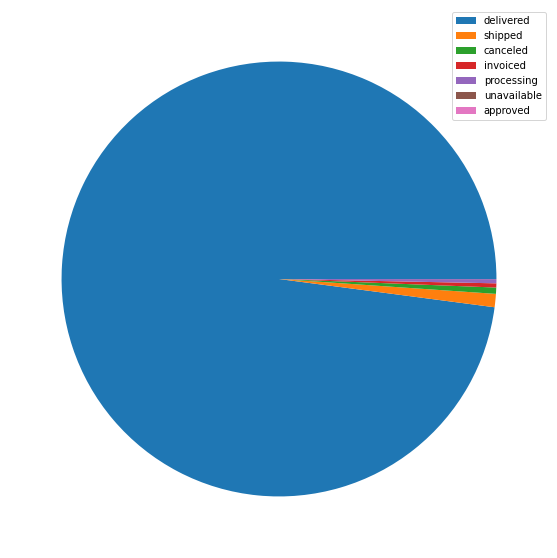

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(primary['order_status'].value_counts(), labels=primary['order_status'].unique(), labeldistance=None)
plt.legend()
plt.show()

Almost all of our orders are delivered or shipped, so we will drop canceled and in progress ones

In [ ]:
primary.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status order_purchase_timestamp   order_approved_at  order_item_id  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15            1.0   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15            1.0   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15            1.0   
3    delivered      2017-08-15 18:29:31 2017-08-15 20:05:16            1.0   
4    delivered      2017-08-02 18:24:47 2017-08-02 18:43:15            1.0   

                         product_id                         seller_id  price  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9  29.99   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9  29.99   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9  29.99   
3  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9  29.99   
4  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9  29.99   

   freight_value  payment_sequential payment_type  payment_value  \
0           8.72                 1.0  credit_card          18.12   
1           8.72                 3.0      voucher           2.00   
2           8.72                 2.0      voucher          18.59   
3           7.78                 1.0  credit_card          37.77   
4           7.78                 1.0  credit_card          37.77   

                          review_id  review_score review_comment_title  \
0  a54f0611adc9ed256b57ede6b6eb5114           4.0             No title   
1  a54f0611adc9ed256b57ede6b6eb5114           4.0             No title   
2  a54f0611adc9ed256b57ede6b6eb5114           4.0             No title   
3  b46f1e34512b0f4c74a72398b03ca788           4.0             No title   
4  dc90f19c2806f1abba9e72ad3c350073           5.0             No title   

                              review_comment_message  \
0  Não testei o produto ainda, mas ele veio corre...   
1  Não testei o produto ainda, mas ele veio corre...   
2  Não testei o produto ainda, mas ele veio corre...   
3  Deveriam embalar melhor o produto. A caixa vei...   
4  Só achei ela pequena pra seis xícaras ,mais é ...   

  product_category_name_english                customer_unique_id  \
0                    housewares  7c396fd4830fd04220f754e42b4e5bff   
1                    housewares  7c396fd4830fd04220f754e42b4e5bff   
2                    housewares  7c396fd4830fd04220f754e42b4e5bff   
3                    housewares  3a51803cc0d012c3b5dc8b7528cb05f7   
4                    housewares  ef0996a1a279c26e7ecbd737be23d235   

   customer_zip_code_prefix customer_city        Lng        Lat  
0                      3149     sao paulo -46.586284 -23.583452  
1                      3149     sao paulo -46.586284 -23.583452  
2                      3149     sao paulo -46.586284 -23.583452  
3                      3366     sao paulo -46.536043 -23.564977  
4                      2290     sao paulo -46.626106 -23.532175

In [ ]:
primary=primary.loc[(primary['order_status'] == "delivered")|(primary['order_status'] == "shipped")]

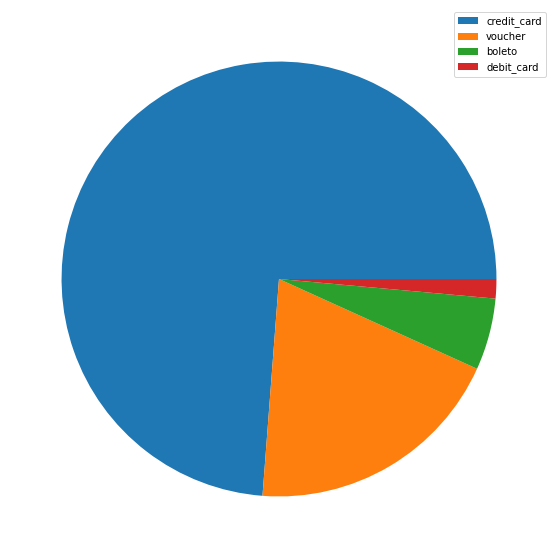

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(primary['payment_type'].value_counts(), labels=primary['payment_type'].unique(), labeldistance=None)
plt.legend()
plt.show()

Most of the payments are with credit cards (~70%) and second biggest one is with voucher (coupon/gift cards, ~20%)


# Creation of RFM Dataset

Let's aggregate all orders by unique customer id and visualise with a boxplot as a result of sum of all the payment

We've to be careful with duplicated row for same order (order item id and payment sequential can duplicate payment_value and lead to misaggregation)

In [ ]:
primary.loc[primary['order_id'] == "b1ce906877fd32ecc3216688454fe6cc"]

order_id                       customer_id  \
32565  b1ce906877fd32ecc3216688454fe6cc  d26e457780ad52f84e0125b43814c02e   
32566  b1ce906877fd32ecc3216688454fe6cc  d26e457780ad52f84e0125b43814c02e   

      order_status order_purchase_timestamp   order_approved_at  \
32565    delivered      2017-12-08 23:27:42 2017-12-08 23:35:20   
32566    delivered      2017-12-08 23:27:42 2017-12-08 23:35:20   

       order_item_id                        product_id  \
32565            1.0  2136c70bbe723d338fab53da3c03e6dc   
32566            1.0  2136c70bbe723d338fab53da3c03e6dc   

                              seller_id  price  freight_value  \
32565  6560211a19b47992c3666cc44a7e94c0   29.0           7.78   
32566  6560211a19b47992c3666cc44a7e94c0   29.0           7.78   

       payment_sequential payment_type  payment_value  \
32565                 1.0  credit_card          23.62   
32566                 2.0      voucher          13.16   

                              review_id  review_score review_comment_title  \
32565  bb8d9050083b9eefecaceba1d8f8bdc7           4.0             No title   
32566  bb8d9050083b9eefecaceba1d8f8bdc7           4.0             No title   

      review_comment_message product_category_name_english  \
32565             No message                 watches_gifts   
32566             No message                 watches_gifts   

                     customer_unique_id  customer_zip_code_prefix  \
32565  2d73921f8b657537c34508cc330e022e                      9771   
32566  2d73921f8b657537c34508cc330e022e                      9771   

               customer_city       Lng        Lat  
32565  sao bernardo do campo -46.53467 -23.708416  
32566  sao bernardo do campo -46.53467 -23.708416

In [ ]:
monetary=primary.groupby(['customer_unique_id', 'order_id', 'payment_sequential'])['payment_value'].unique().reset_index()

for index, row in monetary.iterrows():
  x=row['payment_value']
  y=row['customer_unique_id']
  if y == "0a0a92112bd4c708ca5fde585afaa872" :
    print(x, y)

[13664.08] 0a0a92112bd4c708ca5fde585afaa872


In [ ]:
primary.loc[primary['customer_unique_id'] == '0a0a92112bd4c708ca5fde585afaa872']

order_id                       customer_id  \
114656  03caa2c082116e1d31e67e9ae3700499  1617b1357756262bfa56ab541c47bc16   
114657  03caa2c082116e1d31e67e9ae3700499  1617b1357756262bfa56ab541c47bc16   
114658  03caa2c082116e1d31e67e9ae3700499  1617b1357756262bfa56ab541c47bc16   
114659  03caa2c082116e1d31e67e9ae3700499  1617b1357756262bfa56ab541c47bc16   
114660  03caa2c082116e1d31e67e9ae3700499  1617b1357756262bfa56ab541c47bc16   
114661  03caa2c082116e1d31e67e9ae3700499  1617b1357756262bfa56ab541c47bc16   
114662  03caa2c082116e1d31e67e9ae3700499  1617b1357756262bfa56ab541c47bc16   
114663  03caa2c082116e1d31e67e9ae3700499  1617b1357756262bfa56ab541c47bc16   

       order_status order_purchase_timestamp   order_approved_at  \
114656    delivered      2017-09-29 15:24:52 2017-10-02 15:28:20   
114657    delivered      2017-09-29 15:24:52 2017-10-02 15:28:20   
114658    delivered      2017-09-29 15:24:52 2017-10-02 15:28:20   
114659    delivered      2017-09-29 15:24:52 2017-10-02 15:28:20   
114660    delivered      2017-09-29 15:24:52 2017-10-02 15:28:20   
114661    delivered      2017-09-29 15:24:52 2017-10-02 15:28:20   
114662    delivered      2017-09-29 15:24:52 2017-10-02 15:28:20   
114663    delivered      2017-09-29 15:24:52 2017-10-02 15:28:20   

        order_item_id                        product_id  \
114656            1.0  5769ef0a239114ac3a854af00df129e4   
114657            2.0  5769ef0a239114ac3a854af00df129e4   
114658            3.0  5769ef0a239114ac3a854af00df129e4   
114659            4.0  5769ef0a239114ac3a854af00df129e4   
114660            5.0  5769ef0a239114ac3a854af00df129e4   
114661            6.0  5769ef0a239114ac3a854af00df129e4   
114662            7.0  5769ef0a239114ac3a854af00df129e4   
114663            8.0  5769ef0a239114ac3a854af00df129e4   

                               seller_id   price  freight_value  \
114656  b37c4c02bda3161a7546a4e6d222d5b2  1680.0          28.01   
114657  b37c4c02bda3161a7546a4e6d222d5b2  1680.0          28.01   
114658  b37c4c02bda3161a7546a4e6d222d5b2  1680.0          28.01   
114659  b37c4c02bda3161a7546a4e6d222d5b2  1680.0          28.01   
114660  b37c4c02bda3161a7546a4e6d222d5b2  1680.0          28.01   
114661  b37c4c02bda3161a7546a4e6d222d5b2  1680.0          28.01   
114662  b37c4c02bda3161a7546a4e6d222d5b2  1680.0          28.01   
114663  b37c4c02bda3161a7546a4e6d222d5b2  1680.0          28.01   

        payment_sequential payment_type  payment_value  \
114656                 1.0  credit_card       13664.08   
114657                 1.0  credit_card       13664.08   
114658                 1.0  credit_card       13664.08   
114659                 1.0  credit_card       13664.08   
114660                 1.0  credit_card       13664.08   
114661                 1.0  credit_card       13664.08   
114662                 1.0  credit_card       13664.08   
114663                 1.0  credit_card       13664.08   

                               review_id  review_score review_comment_title  \
114656  211fa81a22870cc634265ea85b751e40           1.0             No title   
114657  211fa81a22870cc634265ea85b751e40           1.0             No title   
114658  211fa81a22870cc634265ea85b751e40           1.0             No title   
114659  211fa81a22870cc634265ea85b751e40           1.0             No title   
114660  211fa81a22870cc634265ea85b751e40           1.0             No title   
114661  211fa81a22870cc634265ea85b751e40           1.0             No title   
114662  211fa81a22870cc634265ea85b751e40           1.0             No title   
114663  211fa81a22870cc634265ea85b751e40           1.0             No title   

                                   review_comment_message  \
114656  Peço por favor verificar a entrega do pedido, ...   
114657  Peço por favor verificar a entrega do pedido, ...   
114658  Peço por favor verificar a entrega do pedido, ...   
114659  Peço por favor verificar a entrega do pedido, ...   
114660  Peço por favor verificar a entre

As we can see we now attributed right value to customer unique id/order id/payment sequential combo.

Now we have to group by customer unique id and order id to erase payment sequential.

And finally we will group by customer to have our monetary dataframe

In [ ]:
monetary['payment_value']=monetary['payment_value'].replace('[', '').replace(']', '').astype(float)

monetary=monetary.groupby(['customer_unique_id', 'order_id']).agg({'payment_value' : 'sum'}).reset_index()
monetary=monetary.groupby('customer_unique_id').agg({'payment_value' : 'sum'}).reset_index()
monetary = monetary.rename(columns = {'payment_value' : 'Monetary'})

monetary.head(10)

customer_unique_id  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f     27.19
2  0000f46a3911fa3c0805444483337064     86.22
3  0000f6ccb0745a6a4b88665a16c9f078     43.62
4  0004aac84e0df4da2b147fca70cf8255    196.89
5  0004bd2a26a76fe21f786e4fbd80607f    166.98
6  00050ab1314c0e55a6ca13cf7181fecf     35.38
7  00053a61a98854899e70ed204dd4bafe    419.18
8  0005e1862207bf6ccc02e4228effd9a0    150.12
9  0005ef4cd20d2893f0d9fbd94d3c0d97    129.76

Let's check our customer unique id from above.

In [ ]:
monetary.loc[monetary['customer_unique_id'] == '0a0a92112bd4c708ca5fde585afaa872']

customer_unique_id  Monetary
3696  0a0a92112bd4c708ca5fde585afaa872  13664.08

Seems ok !

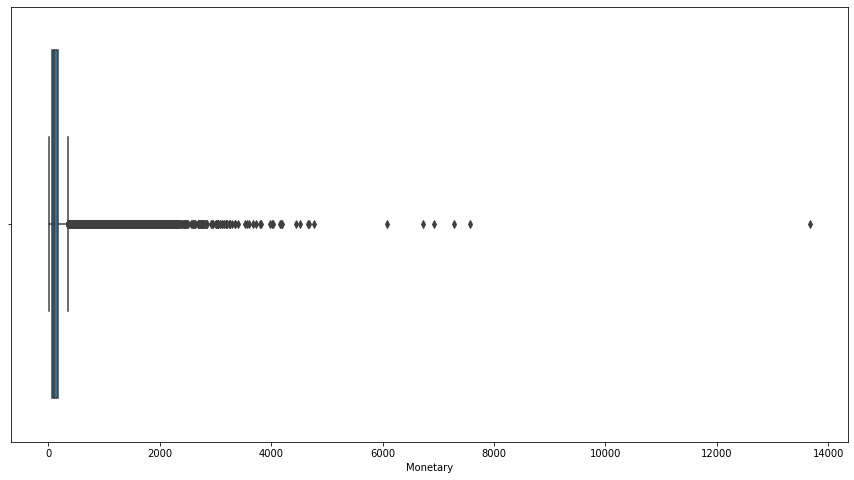

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(monetary['Monetary'])
plt.show()

In [ ]:
monetary.sort_values(by='Monetary', ascending = False)

customer_unique_id  Monetary
3696   0a0a92112bd4c708ca5fde585afaa872  13664.08
78849  da122df9eeddfedc1dc1f5349a1a690c   7571.63
42765  763c8b1c9c68a0229c42c9fc6f662b93   7274.88
79662  dc4802a71eae9be1dd28f5d788ceb526   6929.31
92145  ff4159b92c40ebe40454e3e6a7c35ed6   6726.66
...                                 ...       ...
14668  2878e5b88167faab17d4fb83a986d38b     11.63
40318  6f5b9d1cdccc4d28f0483a612edecacf     11.63
64834  b33336f46234b24a613ad9064d13106d     10.89
68362  bd06ce0e06ad77a7f681f1a4960a3cc6     10.07
17936  317cfc692e3f86c45c95697c61c853a6      9.59

[92417 rows x 2 columns]

As we can see we've a lot of outliers so we will need to delete them before attributing RFM Score

In [ ]:
last_date = primary['order_purchase_timestamp'].max()
print("Latest date in dataset: ",last_date)

Latest date in dataset:  2018-09-03 09:06:57


In [ ]:
recency=primary.groupby('customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
recency['Recency']= recency['order_purchase_timestamp'].apply(lambda x: (last_date - x).days)
recency.head(5)

customer_unique_id order_purchase_timestamp  Recency
0  0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27      115
1  0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27      118
2  0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03      541
3  0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41      325
4  0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42      292

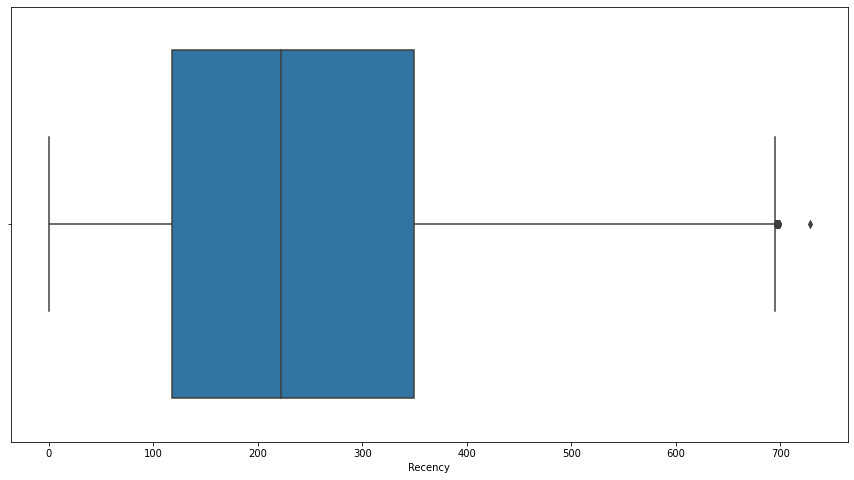

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(recency['Recency'])
plt.show()

On recency side we do not have that much outliers

In [ ]:
frequency = primary.groupby('customer_unique_id', as_index=False)['order_id'].nunique()
frequency = frequency.rename(columns={'order_id' : 'Frequency'})
frequency.sort_values(by='Frequency', ascending=False)

customer_unique_id  Frequency
50955  8d50f5eadf50201ccdcedfb9e2ac8455         15
22578  3e43e6105506432c953e165fb2acf44c          9
73195  ca77025e7201e3b30c44b472ff346268          7
9976   1b6c7548a2a1f9037c1fd3ddfed95f33          7
36383  6469f99c1f9dfae7733b25662e7f1782          7
...                                 ...        ...
31244  56421c47bfd636b238bc5de6eb7c8b87          1
31243  56420296fd5d06cf0488ee32a547b2ba          1
31242  5641fbc9c43b29f905840423c85315be          1
31241  56417f325f6955150cc373b57ec91774          1
92416  ffffd2657e2aad2907e67c3e9daecbeb          1

[92417 rows x 2 columns]

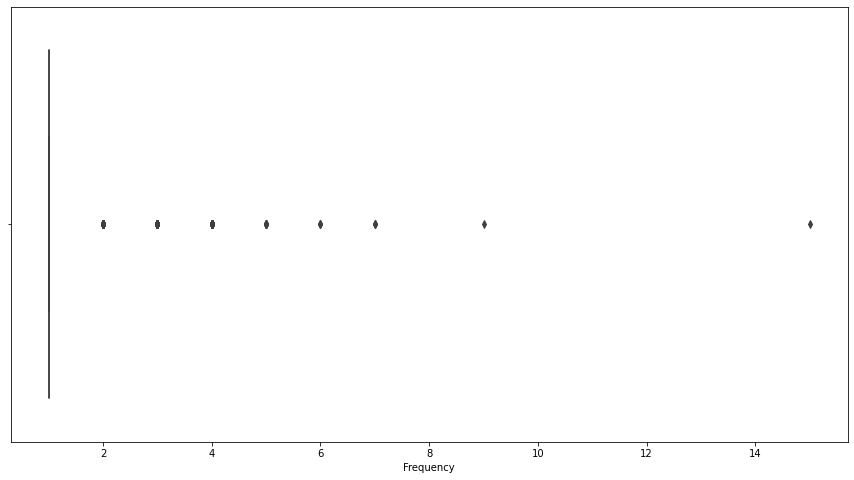

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(frequency['Frequency'])
plt.show()

Here again it seems like there is a few customer that are buying more often than others

Before identifying outliers to drop them, we have to merge the 3 dataframes created.

In [ ]:
df1 = monetary.merge(recency, on='customer_unique_id', how='inner').drop(columns='order_purchase_timestamp')
RFM = df1.merge(frequency, on='customer_unique_id', how='inner')
RFM.head(10)

customer_unique_id  Monetary  Recency  Frequency
0  0000366f3b9a7992bf8c76cfdf3221e2    141.90      115          1
1  0000b849f77a49e4a4ce2b2a4ca5be3f     27.19      118          1
2  0000f46a3911fa3c0805444483337064     86.22      541          1
3  0000f6ccb0745a6a4b88665a16c9f078     43.62      325          1
4  0004aac84e0df4da2b147fca70cf8255    196.89      292          1
5  0004bd2a26a76fe21f786e4fbd80607f    166.98      150          1
6  00050ab1314c0e55a6ca13cf7181fecf     35.38      135          1
7  00053a61a98854899e70ed204dd4bafe    419.18      186          1
8  0005e1862207bf6ccc02e4228effd9a0    150.12      547          1
9  0005ef4cd20d2893f0d9fbd94d3c0d97    129.76      174          1

All-in-One Plot

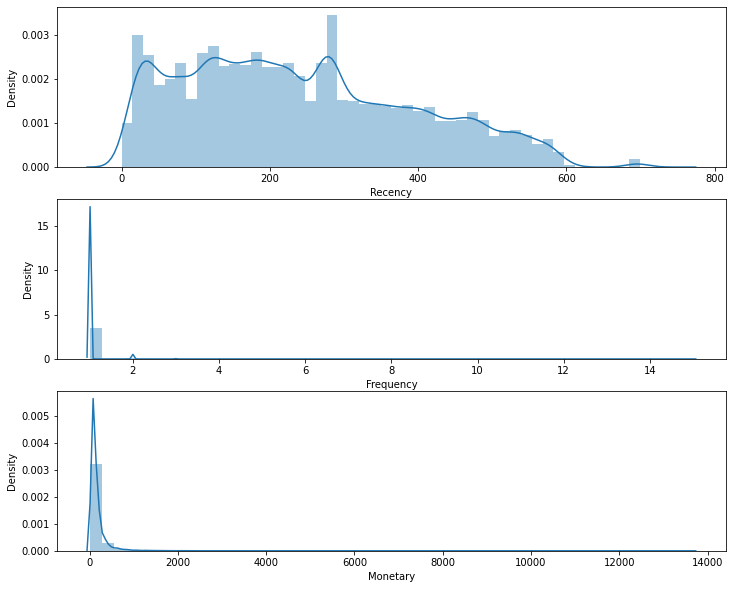

In [ ]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(RFM['Recency'])
plt.subplot(3, 1, 2); sns.distplot(RFM['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(RFM['Monetary'])
plt.show()

In [ ]:
RFM.describe().T

count        mean         std   min    25%     50%     75%  \
Monetary   92417.0  165.095323  224.727800  9.59   63.1  107.77  182.91   
Recency    92417.0  240.973728  152.674276  0.00  118.0  222.00  349.00   
Frequency  92417.0    1.033176    0.207635  1.00    1.0    1.00    1.00   

                max  
Monetary   13664.08  
Recency      728.00  
Frequency     15.00

Let's see how many customers have more than 1 order.


In [ ]:
print(len(RFM), len(RFM.loc[RFM['Frequency'] > 1]))

92417 2760


We will create 3 subsets of this dataframe and perform differents analysis and clustering.

First one will contains only customers with more than 1 order.

Second one will contains only customers with only 1 orders.

Last one will have all customers.

In [ ]:
one_o=RFM.loc[RFM['Frequency'] == 1].reset_index(drop=True)
sev_o=RFM.loc[RFM['Frequency'] > 1].reset_index(drop=True)
all_o=RFM.copy()
RFM_dfs=[one_o,sev_o,all_o]
print('One order :', len(one_o))
print('More than one order :', len(sev_o))
print('All customers :', len(all_o))

One order : 89657
More than one order : 2760
All customers : 92417


I'll create functions to create RFM Score.

In [ ]:
# x=Value , p = cols, d=percentile dictionnary

def RScore(x,p,d) :
  if x <= d[p][0.2] :
    return 5
  elif x <= d[p][0.4] :
    return 4
  elif x <= d[p][0.6000000000000001] :
    return 3
  elif x <= d[p][0.8] :
    return 2
  else :
    return 1

def FMScore(x,p,d) :
  if x <= d[p][0.2] :
    return 1
  elif x <= d[p][0.4] :
    return 2
  elif x <= d[p][0.6000000000000001] :
    return 3
  elif x <= d[p][0.8] :
    return 4
  else :
    return 5

# RFM Scoring for Customers with more than 1 orders

### RFM

In [ ]:
quantiles=sev_o.quantile(q=np.arange(0,1,0.2)).to_dict()

In [ ]:
sev_o["recency_score"]  = sev_o['Recency'].apply(RScore, args=('Recency', quantiles))
sev_o["frequency_score"]= sev_o['Frequency'].apply(FMScore, args=('Frequency', quantiles))
sev_o["monetary_score"] = sev_o['Monetary'].apply(FMScore, args=('Monetary', quantiles))
sev_o['RFM_SCORE'] = sev_o.recency_score.astype(str)+ sev_o.frequency_score.astype(str) + sev_o.monetary_score.astype(str)

sev_o.head(5)

customer_unique_id  Monetary  Recency  Frequency  \
0  004288347e5e88a27ded2bb23747066c    354.37      232          2   
1  004b45ec5c64187465168251cd1c9c2f    147.72       99          2   
2  00a39521eb40f7012db50455bf083460    123.25       91          2   
3  00cc12a6d8b578b8ebd21ea4e2ae8b27    126.20      530          2   
4  011575986092c30523ecb71ff10cb473    214.90      137          2   

   recency_score  frequency_score  monetary_score RFM_SCORE  
0              3                1               4       314  
1              4                1               2       412  
2              4                1               1       411  
3              1                1               1       111  
4              4                1               3       413

Let's have a look on the distribution of customers.

In [ ]:
fig = px.scatter_3d(sev_o, x='Recency', y='Frequency', z='Monetary',
              color='RFM_SCORE')
fig.show()

In [ ]:
print("BEST CUSTOMERS :", len(sev_o[sev_o['RFM_SCORE']=='555']))
print("LOYAL CUSTOMERS :", len(sev_o[sev_o['frequency_score']==5]))
print("BIG SPENDERS :", len(sev_o[sev_o['monetary_score']== 5]))
print("LOST CUSTOMERS :", len(sev_o[sev_o['RFM_SCORE']=='155']))
print("LOST CHEAP CUSTOMERS :", len(sev_o[sev_o['RFM_SCORE']=='111']))

BEST CUSTOMERS : 30
LOYAL CUSTOMERS : 219
BIG SPENDERS : 552
LOST CUSTOMERS : 8
LOST CHEAP CUSTOMERS : 124


### Kmeans

In [ ]:
X=sev_o.iloc[:,:-4].drop(columns='customer_unique_id').values

X_norm = RobustScaler().fit_transform(X)

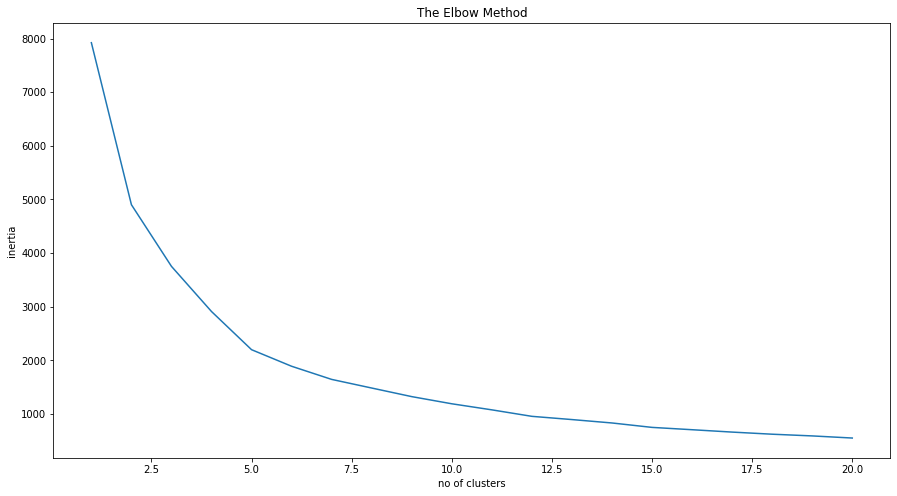

In [ ]:
inertia=[]

for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(X_norm)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(1,21), inertia)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('inertia')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6856089667021267
For n_clusters = 3 The average silhouette_score is : 0.6251151022586827
For n_clusters = 4 The average silhouette_score is : 0.41350984001027447
For n_clusters = 5 The average silhouette_score is : 0.3771513997284514
For n_clusters = 6 The average silhouette_score is : 0.3725609763923528
For n_clusters = 7 The average silhouette_score is : 0.3823562958727439
For n_clusters = 8 The average silhouette_score is : 0.36300701570007565
For n_clusters = 9 The average silhouette_score is : 0.34824099016234966
For n_clusters = 10 The average silhouette_score is : 0.3327729458346089


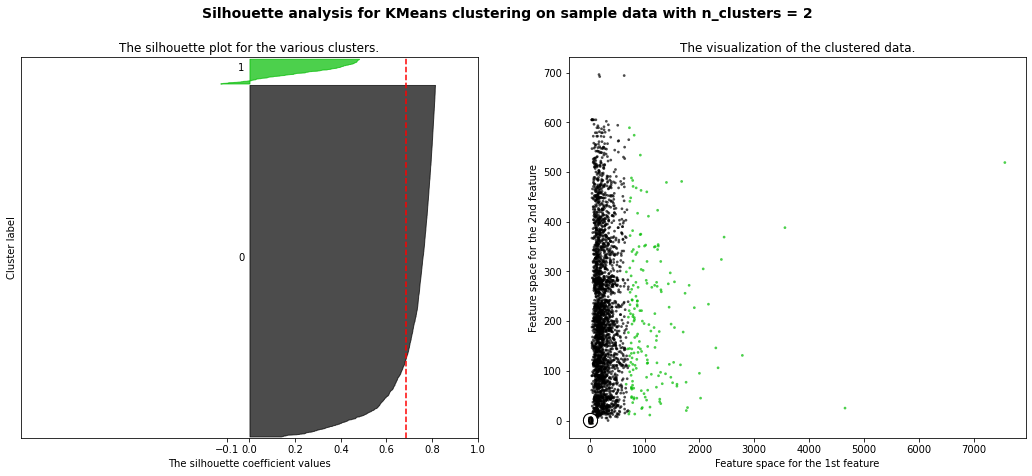

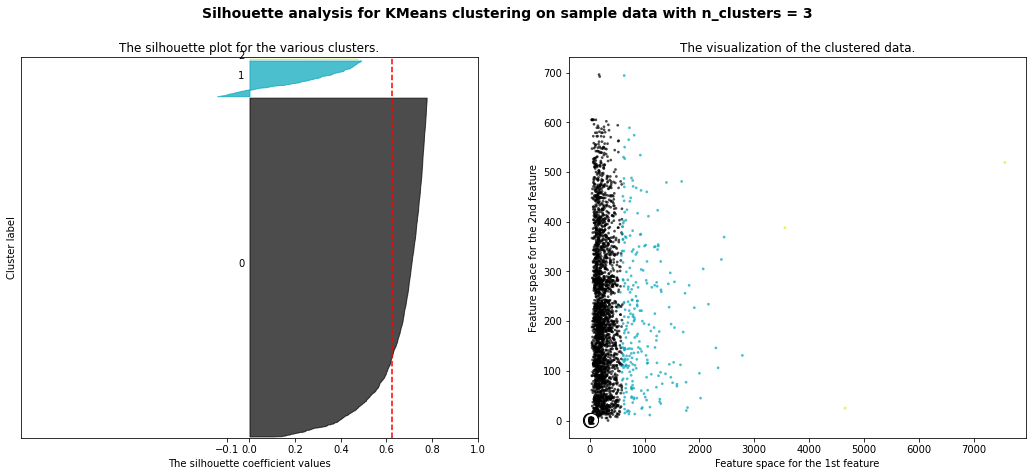

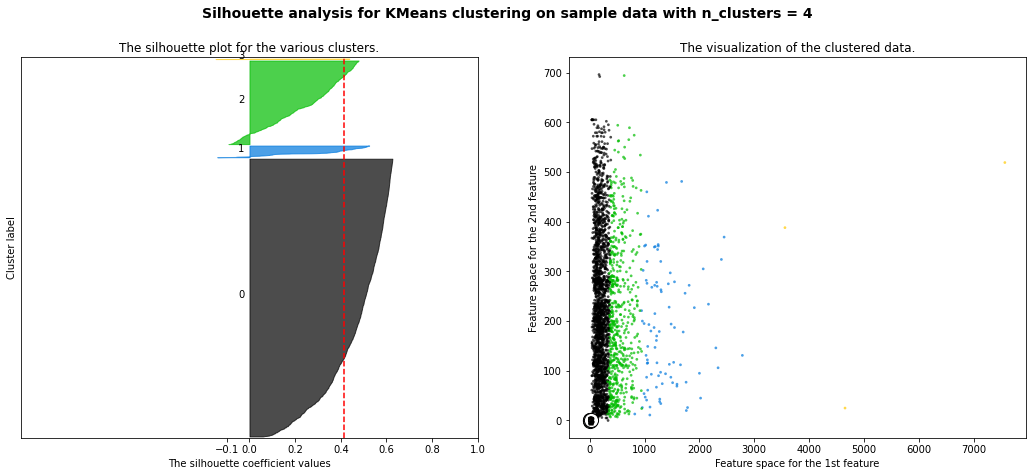

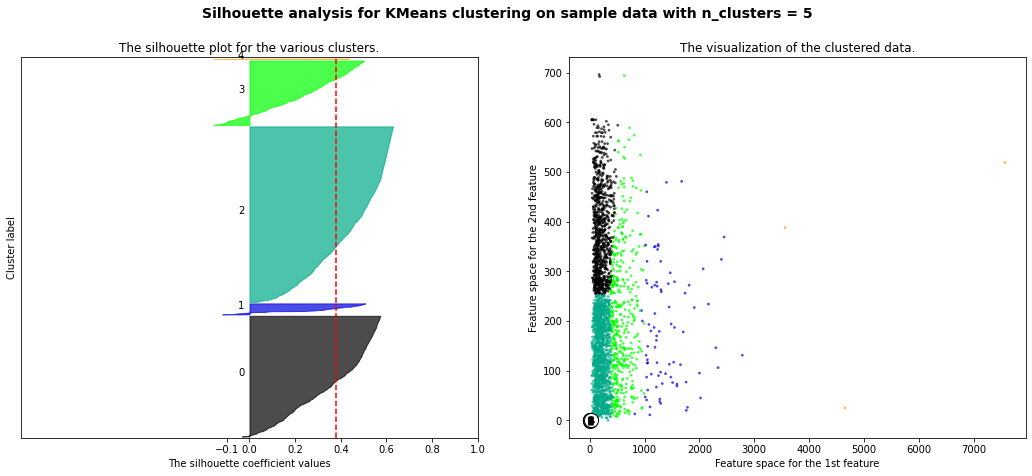

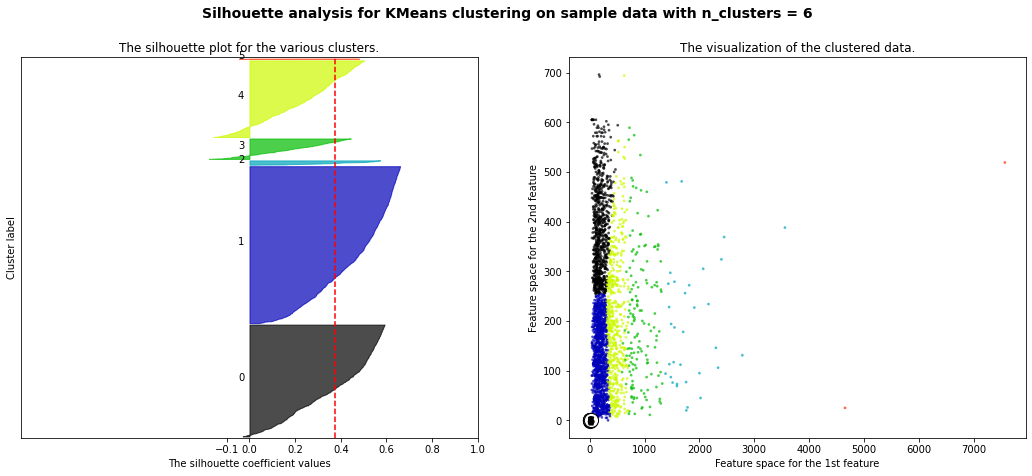

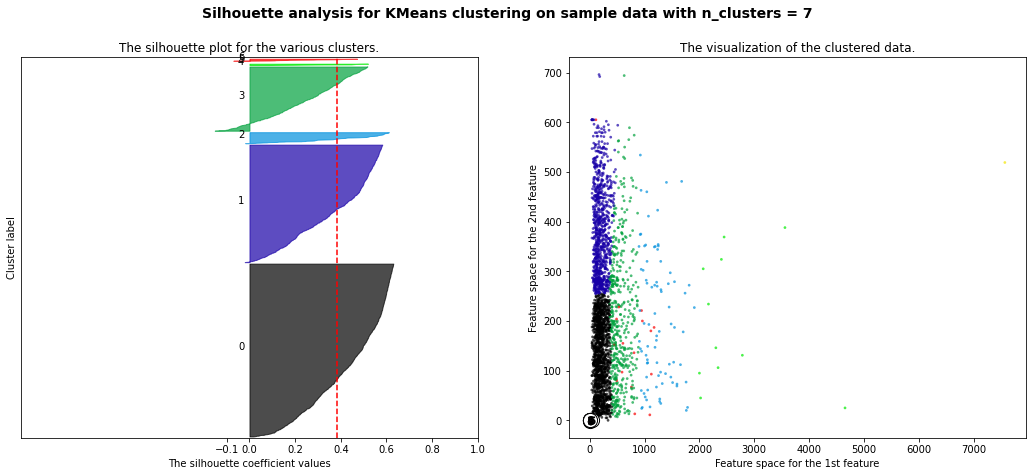

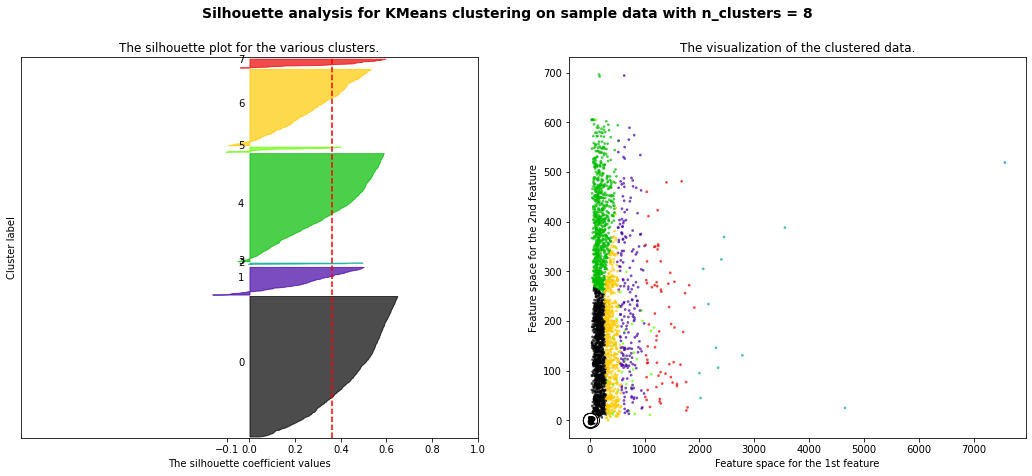

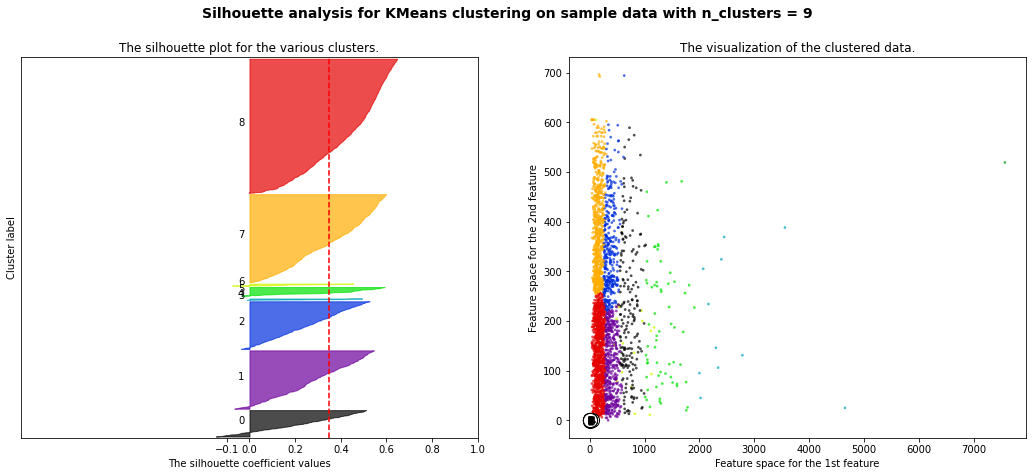

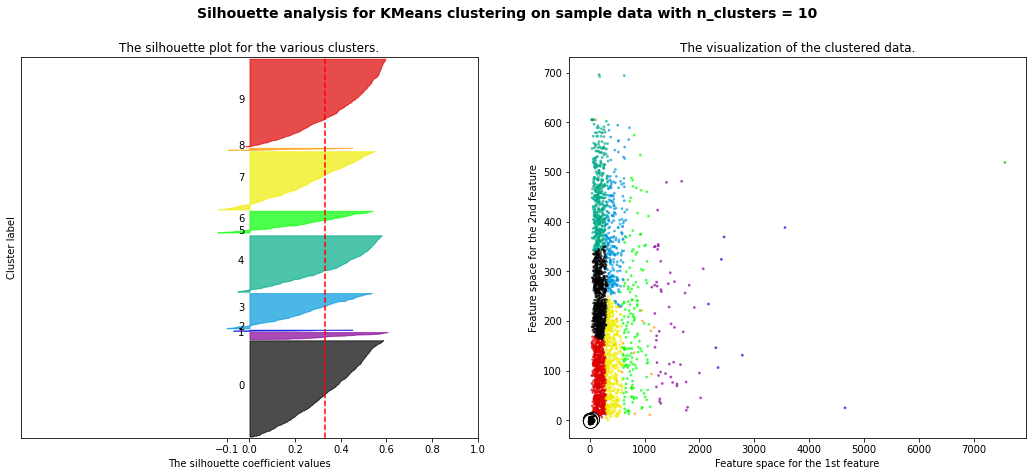

In [ ]:
### Silhouette Method

range_n_clusters = range(2,11)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_norm, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

When n_cluster = 3, we've the best silhouette score (0.45), but elbow method recommend n_cluster = 5.

When we analyse the right plot for 3 and 5 clusters we see that 5 clusters gives us a better segmentation on feature space for the second feature.

So we will perform a Kmeans with n_clusters = 5.

In [ ]:
kmeans = KMeans(n_clusters=5)
label=kmeans.fit_predict(X_norm)
cluster_labels = kmeans.labels_
centroids_kmeans=kmeans.cluster_centers_
clust_data = sev_o.iloc[:,:-4].drop(columns='customer_unique_id').assign(Cluster = cluster_labels)
cluster_avg = clust_data.groupby(['Cluster']).mean()
cluster_avg = cluster_avg.assign(Nb_Customers = pd.Series(label).value_counts())

graph_clust = pd.DataFrame(X_norm,columns = ['Monetary', 'Recency', 'Frequency']).assign(Cluster = cluster_labels)

In [ ]:
fig = px.scatter_3d(graph_clust, x='Recency', y='Frequency', z='Monetary',
              color='Cluster')

fig.show()

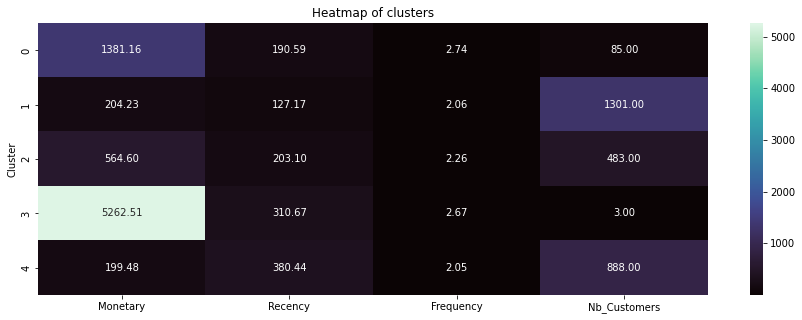

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Heatmap of clusters')
sns.heatmap(data=cluster_avg, annot=True, fmt='.2f', cmap='mako')
plt.show()

Lowest Monetary value and Frequency, Highest recency,  we can call this cluster "Lost customers" since we did not see them for more than a year.

Same Monetary and Frequency value than Lost customers but recency is 4 months ago and it contains almost 50% of all customers. So we can call them cheap active customers.

First thing first, it contains only 3 customers, it has the highest (by far) Monetary value but recency is almost a year ago so we can call them Lost VIP customers.

Based on same analysis of cluster 1, due to the higher Monetary value, we can call this cluster Medium active customers.

Finally, last cluster is composed by our best/VIP customers.

## Classification with Machine Learning algorithms

#### New features

We will try to see if adding new features can improve clustering and also if using an other algorithm such as DBScan helps too.

In [ ]:
### Getting back more than 1 order dataframe to original
sev_o=sev_o.iloc[:,:-4]

In [ ]:
### Let's see which columns from og dataset could be used
primary.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_item_id', 'product_id', 'seller_id',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'product_category_name_english',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'Lng', 'Lat'],
      dtype='object')

We will had to our dataframe :

- number of unique product bought by customer
- total product bought (all orders)
- number of unique category bought by customer
- percentage of different payement type

In [ ]:
list_cust=sev_o['customer_unique_id'].tolist()
olist_select=primary.loc[primary['customer_unique_id'].isin(list_cust)].reset_index(drop=True)
print(olist.shape[0], olist_select.shape[0])

119143 8074


Number of unique product bought

In [ ]:
unique_prod=olist_select.groupby(['customer_unique_id'])['product_category_name_english'].nunique().reset_index().rename(columns={'product_category_name_english':'Nb_category_bought'})
sev_o=pd.merge(sev_o, unique_prod, how='inner')
sev_o

customer_unique_id  Monetary  Recency  Frequency  \
0     004288347e5e88a27ded2bb23747066c    354.37      232          2   
1     004b45ec5c64187465168251cd1c9c2f    147.72       99          2   
2     00a39521eb40f7012db50455bf083460    123.25       91          2   
3     00cc12a6d8b578b8ebd21ea4e2ae8b27    126.20      530          2   
4     011575986092c30523ecb71ff10cb473    214.90      137          2   
...                                ...       ...      ...        ...   
2755  ff22e30958c13ffe219db7d711e8f564    332.92        0          2   
2756  ff44401d0d8f5b9c54a47374eb48c1b8     68.00      471          2   
2757  ff8892f7c26aa0446da53d01b18df463    330.14      280          2   
2758  ff922bdd6bafcdf99cb90d7f39cea5b3    139.60      353          3   
2759  ffe254cc039740e17dd15a5305035928     80.12      518          2   

      Nb_category_bought  
0                      2  
1                      2  
2                      2  
3                      2  
4                      2  
...                  ...  
2755                   1  
2756                   1  
2757                   2  
2758                   3  
2759                   1  

[2760 rows x 5 columns]

Number of product bought (all orders)

In [ ]:
nb_prod=olist_select.groupby(['customer_unique_id', 'order_id'])['order_item_id'].max().reset_index()
nb_prod_max=nb_prod.groupby(['customer_unique_id'])['order_item_id'].max().reset_index().rename(columns={'order_item_id':'Nb_max_item'})
nb_prod = nb_prod.groupby(['customer_unique_id'])['order_item_id'].sum().reset_index().rename(columns={'order_item_id':'Nb_total_item'})

trans=pd.merge(nb_prod,nb_prod_max, how='inner')
sev_o=pd.merge(sev_o, trans, how='inner')
sev_o

customer_unique_id  Monetary  Recency  Frequency  \
0     004288347e5e88a27ded2bb23747066c    354.37      232          2   
1     004b45ec5c64187465168251cd1c9c2f    147.72       99          2   
2     00a39521eb40f7012db50455bf083460    123.25       91          2   
3     00cc12a6d8b578b8ebd21ea4e2ae8b27    126.20      530          2   
4     011575986092c30523ecb71ff10cb473    214.90      137          2   
...                                ...       ...      ...        ...   
2755  ff22e30958c13ffe219db7d711e8f564    332.92        0          2   
2756  ff44401d0d8f5b9c54a47374eb48c1b8     68.00      471          2   
2757  ff8892f7c26aa0446da53d01b18df463    330.14      280          2   
2758  ff922bdd6bafcdf99cb90d7f39cea5b3    139.60      353          3   
2759  ffe254cc039740e17dd15a5305035928     80.12      518          2   

      Nb_category_bought  Nb_total_item  Nb_max_item  
0                      2            2.0          1.0  
1                      2            2.0          1.0  
2                      2            2.0          1.0  
3                      2            2.0          1.0  
4                      2            2.0          1.0  
...                  ...            ...          ...  
2755                   1            2.0          1.0  
2756                   1            2.0          1.0  
2757                   2            2.0          1.0  
2758                   3            3.0          1.0  
2759                   1            2.0          1.0  

[2760 rows x 7 columns]

Percentage payment type

In [ ]:
payment=pd.pivot_table(olist_select, index = ['customer_unique_id', 'order_id'], columns='payment_type', values='payment_value', aggfunc='count').fillna(0).reset_index()
payment['Total']= payment.sum(axis=1)

payment=payment.groupby('customer_unique_id').sum().reset_index()
payment.iloc[:,1:]=payment.iloc[:,1:].apply(lambda x:round(x/payment['Total'], 2))
payment.drop(columns='Total', inplace=True)

sev_o=pd.merge(sev_o, payment, how='inner')
sev_o

customer_unique_id  Monetary  Recency  Frequency  \
0     004288347e5e88a27ded2bb23747066c    354.37      232          2   
1     004b45ec5c64187465168251cd1c9c2f    147.72       99          2   
2     00a39521eb40f7012db50455bf083460    123.25       91          2   
3     00cc12a6d8b578b8ebd21ea4e2ae8b27    126.20      530          2   
4     011575986092c30523ecb71ff10cb473    214.90      137          2   
...                                ...       ...      ...        ...   
2755  ff22e30958c13ffe219db7d711e8f564    332.92        0          2   
2756  ff44401d0d8f5b9c54a47374eb48c1b8     68.00      471          2   
2757  ff8892f7c26aa0446da53d01b18df463    330.14      280          2   
2758  ff922bdd6bafcdf99cb90d7f39cea5b3    139.60      353          3   
2759  ffe254cc039740e17dd15a5305035928     80.12      518          2   

      Nb_category_bought  Nb_total_item  Nb_max_item  boleto  credit_card  \
0                      2            2.0          1.0     0.0          1.0   
1                      2            2.0          1.0     1.0          0.0   
2                      2            2.0          1.0     0.0          1.0   
3                      2            2.0          1.0     1.0          0.0   
4                      2            2.0          1.0     0.0          1.0   
...                  ...            ...          ...     ...          ...   
2755                   1            2.0          1.0     0.0          0.5   
2756                   1            2.0          1.0     0.0          0.5   
2757                   2            2.0          1.0     0.0          1.0   
2758                   3            3.0          1.0     0.0          1.0   
2759                   1            2.0          1.0     0.0          1.0   

      debit_card  voucher  
0            0.0      0.0  
1            0.0      0.0  
2            0.0      0.0  
3            0.0      0.0  
4            0.0      0.0  
...          ...      ...  
2755         0.0      0.5  
2756         0.0      0.5  
2757         0.0      0.0  
2758         0.0      0.0  
2759         0.0      0.0  

[2760 rows x 11 columns]

We also have to take into account customer satisfaction so we will create features based on reviews.

In [ ]:
rws=olist_select.groupby(['customer_unique_id', 'review_id'])['review_score'].max().reset_index()
rws_max=rws.groupby(['customer_unique_id'])['review_score'].max().reset_index().rename(columns={'review_score':'Best_score_attributed'})
rws_mean=rws.groupby(['customer_unique_id'])['review_score'].mean().round(1).reset_index().rename(columns={'review_score':'Avg_score_attributed'})
rws_min=rws.groupby(['customer_unique_id'])['review_score'].min().reset_index().rename(columns={'review_score':'Min_score_attributed'})

In [ ]:
trans=pd.merge(rws_max,rws_mean, how='inner')
trans=pd.merge(trans,rws_min, how='inner')
sev_o=pd.merge(sev_o, trans, how='inner')
sev_o

customer_unique_id  Monetary  Recency  Frequency  \
0     004288347e5e88a27ded2bb23747066c    354.37      232          2   
1     004b45ec5c64187465168251cd1c9c2f    147.72       99          2   
2     00a39521eb40f7012db50455bf083460    123.25       91          2   
3     00cc12a6d8b578b8ebd21ea4e2ae8b27    126.20      530          2   
4     011575986092c30523ecb71ff10cb473    214.90      137          2   
...                                ...       ...      ...        ...   
2755  ff22e30958c13ffe219db7d711e8f564    332.92        0          2   
2756  ff44401d0d8f5b9c54a47374eb48c1b8     68.00      471          2   
2757  ff8892f7c26aa0446da53d01b18df463    330.14      280          2   
2758  ff922bdd6bafcdf99cb90d7f39cea5b3    139.60      353          3   
2759  ffe254cc039740e17dd15a5305035928     80.12      518          2   

      Nb_category_bought  Nb_total_item  Nb_max_item  boleto  credit_card  \
0                      2            2.0          1.0     0.0          1.0   
1                      2            2.0          1.0     1.0          0.0   
2                      2            2.0          1.0     0.0          1.0   
3                      2            2.0          1.0     1.0          0.0   
4                      2            2.0          1.0     0.0          1.0   
...                  ...            ...          ...     ...          ...   
2755                   1            2.0          1.0     0.0          0.5   
2756                   1            2.0          1.0     0.0          0.5   
2757                   2            2.0          1.0     0.0          1.0   
2758                   3            3.0          1.0     0.0          1.0   
2759                   1            2.0          1.0     0.0          1.0   

      debit_card  voucher  Best_score_attributed  Avg_score_attributed  \
0            0.0      0.0                    5.0                   5.0   
1            0.0      0.0                    5.0                   3.0   
2            0.0      0.0                    4.0                   4.0   
3            0.0      0.0                    5.0                   4.0   
4            0.0      0.0                    4.0                   3.5   
...          ...      ...                    ...                   ...   
2755         0.0      0.5                    1.0                   1.0   
2756         0.0      0.5                    3.0                   3.0   
2757         0.0      0.0                    5.0                   2.7   
2758         0.0      0.0                    5.0                   4.3   
2759         0.0      0.0                    5.0                   3.0   

      Min_score_attributed  
0                      5.0  
1                      1.0  
2                      4.0  
3                      3.0  
4                      3.0  
...                    ...  
2755                   1.0  
2756                   3.0  
2757                   1.0  
2758                   3.0  
2759                   1.0  

[2760 rows x 14 columns]

#### Dimension Reduction & Clustering

##### PCA & Kmeans

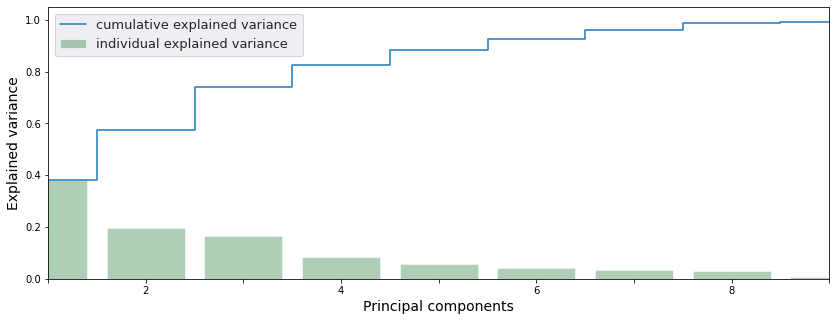

In [ ]:
X_pca=sev_o.drop(columns='customer_unique_id')

X_norm_pca = RobustScaler().fit_transform(X_pca.values)

pca = PCA()
pca_samples = pca.fit_transform(X_norm_pca)

fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(X_norm_pca.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,X_norm_pca.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 8)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13)
plt.show()

We will choose 3 principal components because they explain 80% of variance and it will be easier to do some data vizualisation.

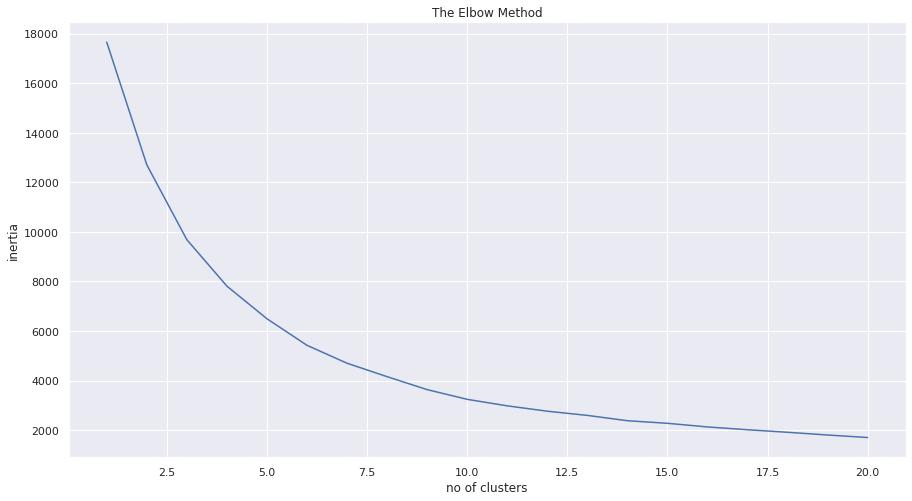

In [ ]:
pca_3 = PCA(n_components=3)
X_3 = pca_3.fit_transform(X_norm_pca)

inertia=[]

for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(X_3)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(1,21), inertia)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('inertia')
plt.show()

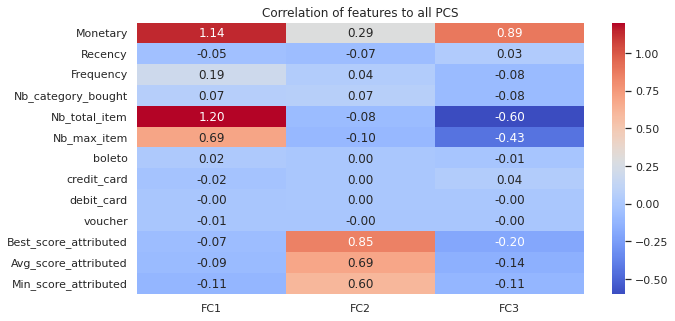

In [ ]:
loadings = pca_3.components_.T * np.sqrt(pca_3.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['FC1', 'FC2', 'FC3'], index=X_pca.columns)

plt.figure(figsize=(10, 5))
plt.title('Correlation of features to all PCS')
sns.heatmap(data=loading_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

As we can see here, PC1 is correlated positively to Monetary, and nb of item bought. PC2 is correlated to customers satisfaction and PC3 is correlated positively to Monetary but this time negatively to nb of items.

For n_clusters = 2 The average silhouette_score is : 0.6273272834867974
For n_clusters = 3 The average silhouette_score is : 0.4941646462810489
For n_clusters = 4 The average silhouette_score is : 0.4787192724220183
For n_clusters = 5 The average silhouette_score is : 0.43628005144859744
For n_clusters = 6 The average silhouette_score is : 0.43714337133512265
For n_clusters = 7 The average silhouette_score is : 0.4221595269337546
For n_clusters = 8 The average silhouette_score is : 0.42412799222916575
For n_clusters = 9 The average silhouette_score is : 0.43128693994958306
For n_clusters = 10 The average silhouette_score is : 0.44396179663132357


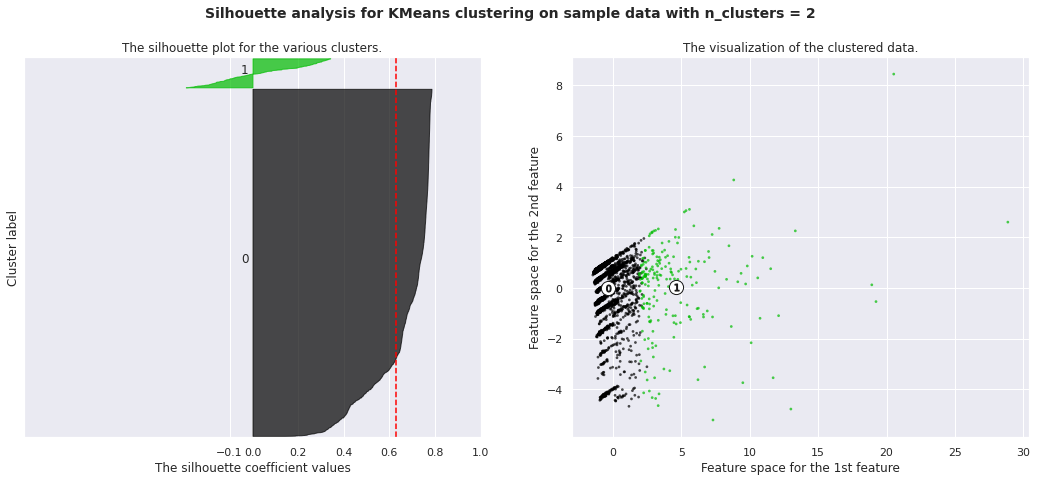

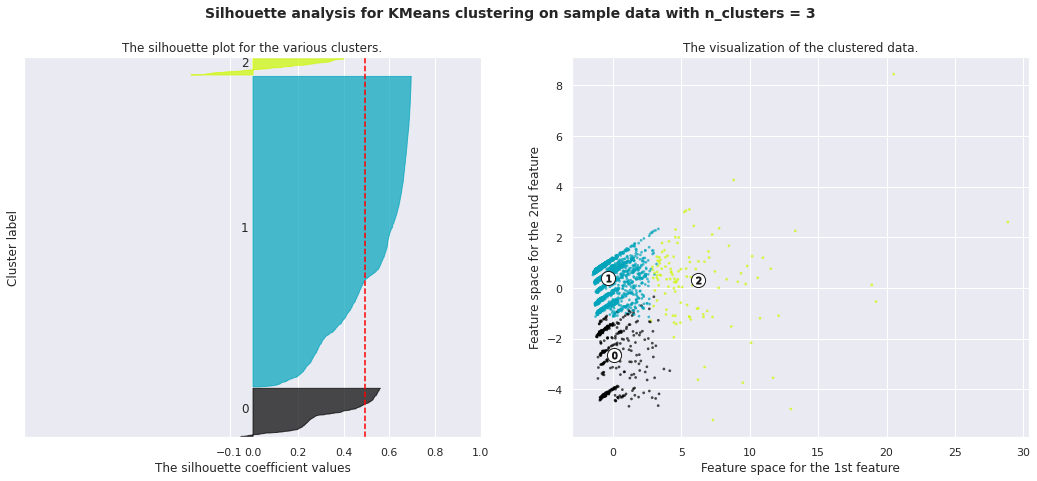

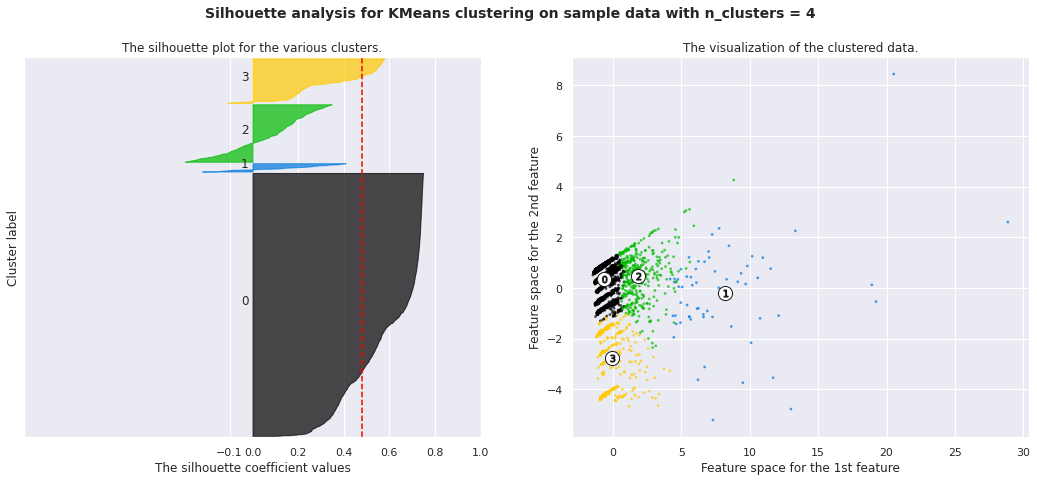

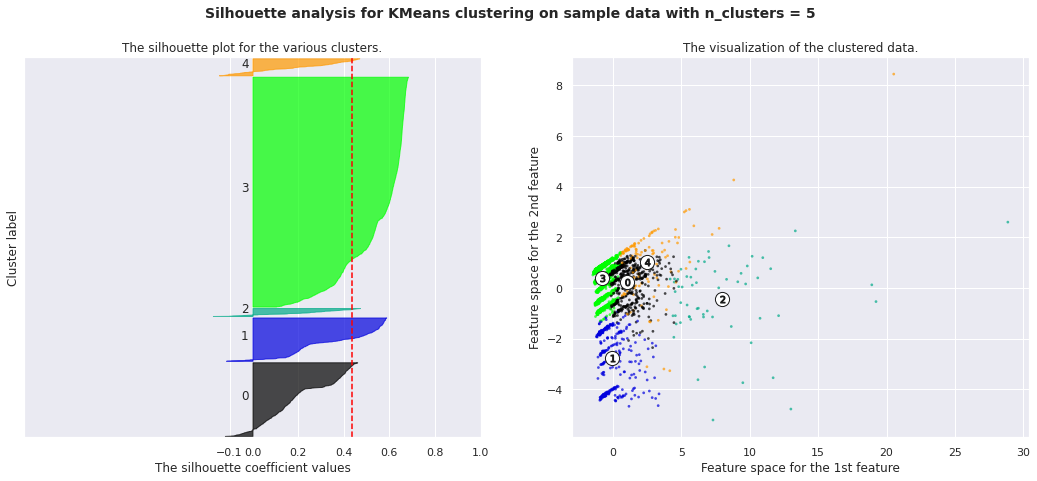

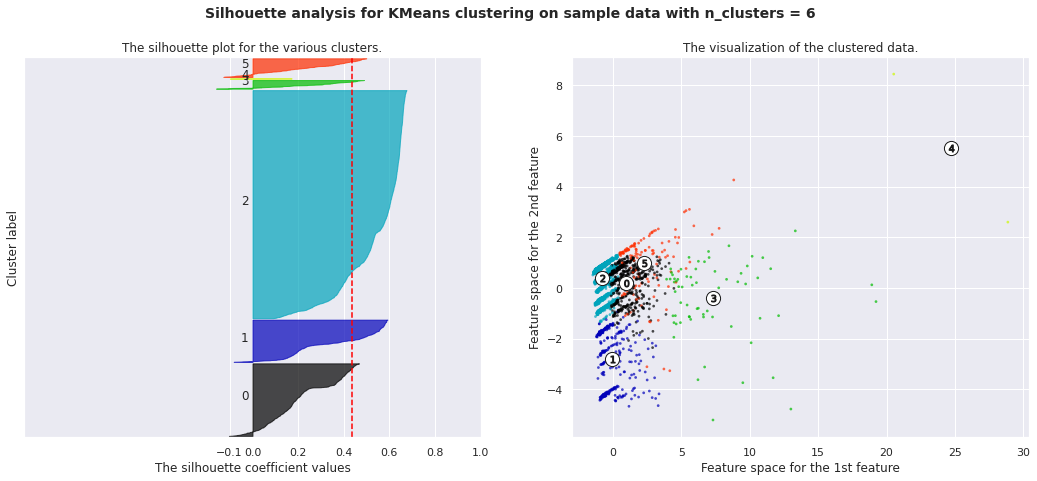

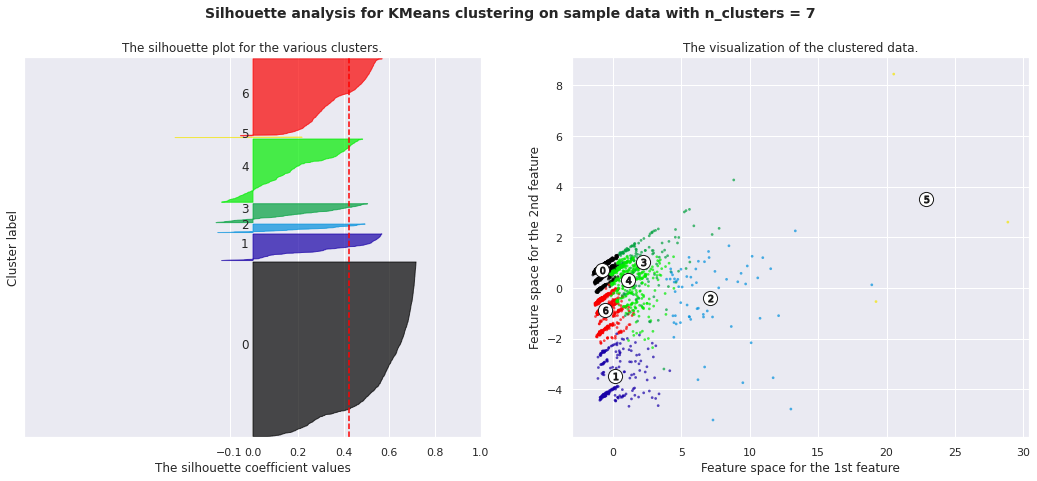

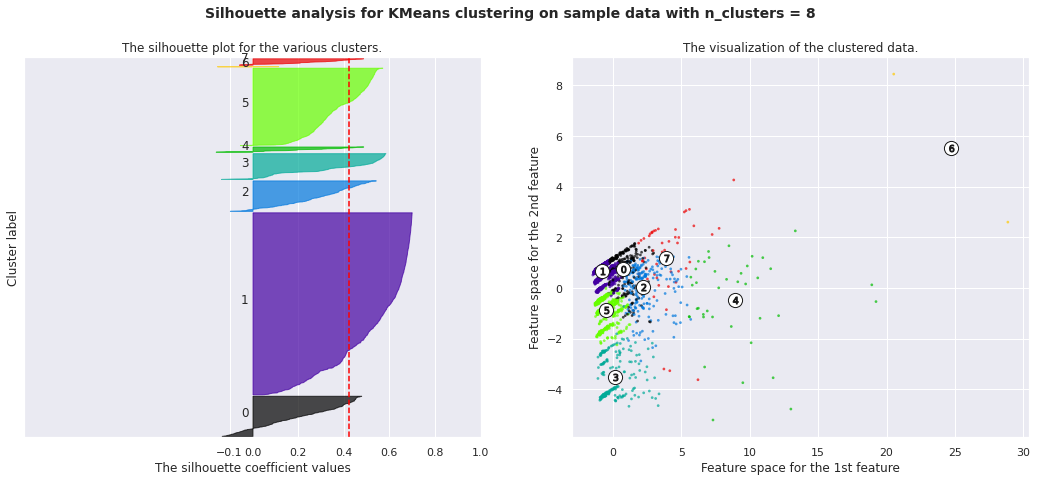

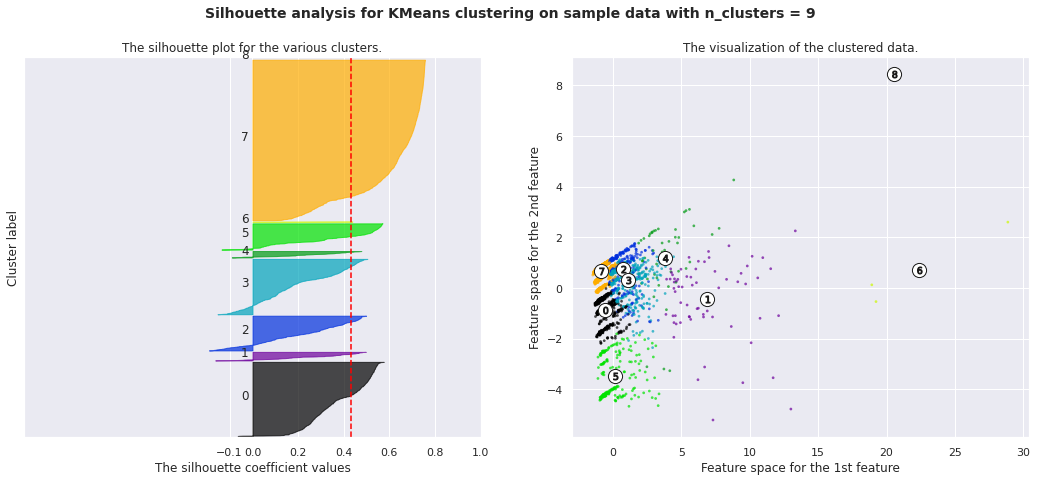

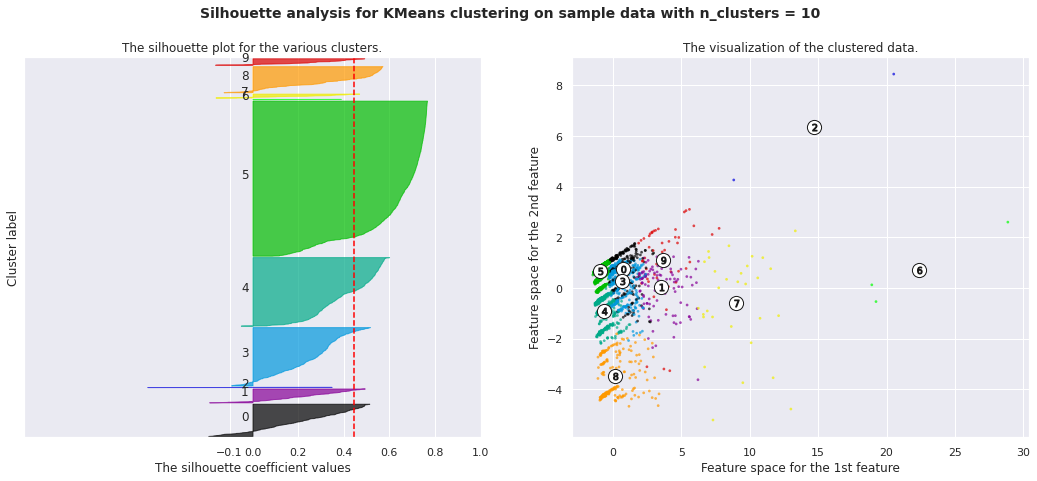

In [ ]:
### Silhouette Method

range_n_clusters = range(2,11)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_3) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_3)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_3, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_3, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_3[:, 0], X_3[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

As we can see with silhouette score and visualisation, 4 clusters seems to be the best here (and we keep the same number as before)

In [ ]:
kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(X_3)
cluster_labels = kmeans.labels_
clust_pca = sev_o.drop(columns='customer_unique_id').assign(Cluster = cluster_labels)
cluster_pca_avg = clust_pca.groupby(['Cluster']).mean()
cluster_pca_avg = cluster_pca_avg.assign(Nb_Customers = pd.Series(label).value_counts())
centroids_pca_kmeans=kmeans.cluster_centers_
graph_clust_PCA = pd.DataFrame(X_3,columns = ['FC1', 'FC2', 'FC3']).assign(Cluster = cluster_labels)


In [ ]:
fig = px.scatter_3d(graph_clust_PCA, x='FC1', y='FC2', z='FC3',
              color='Cluster')
fig.show()

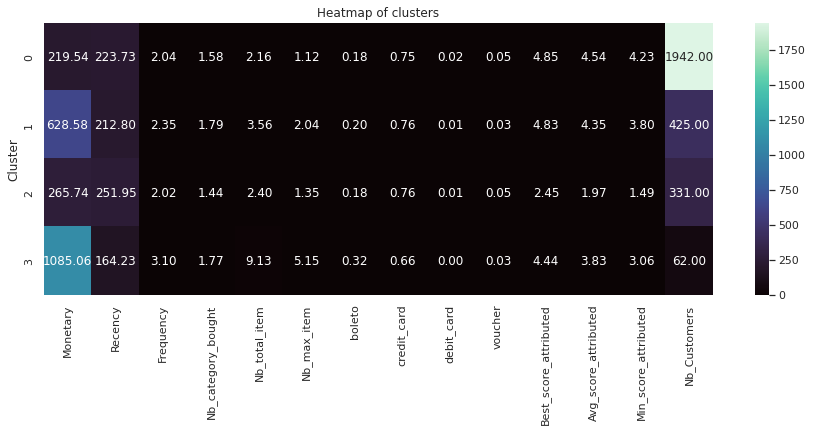

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Heatmap of clusters')
sns.heatmap(data=cluster_pca_avg, annot=True, fmt='.2f', cmap='mako')
plt.show()

##### UMAP & HDBscan

We will reduce dimensionality using UMAP and cluster using HDBscan and see if it perform better than PCA associated to Kmeans.

Then we will compare best approach to the basic RFM & Kmeans approach.

In [ ]:
X_umap=sev_o.drop(columns='customer_unique_id')

X_norm_umap = RobustScaler().fit_transform(X_umap.values)

In [ ]:
reducer=umap.UMAP(n_components=3,random_state=42)

umap_3=reducer.fit_transform(X_norm_umap)
print(umap_3.shape)

(2760, 3)


Density Based Clustering Validation or DBCV works for density-based clustering algorithms precisely because it takes noise into account and captures the shape property of clusters via densities and not distances.

Final result of DBCV is a weighted sum of “Validity Index” values of clusters. This produces a score between -1 to 1, with the larger the value the better clustering solution.

credits : [**Density-Based Clustering Validation**](https://www.dbs.ifi.lmu.de/~zimek/publications/SDM2014/DBCV.pdf) by Davoud Moulavi , Pablo A. Jaskowiak, Ricardo J. G. B. Campello ,Arthur Zimek ,Jörg Sander


In [ ]:
hdb = hdbscan.HDBSCAN(gen_min_span_tree=True).fit(umap_3)

param_dist = {'min_samples': [75,90,100,125,150],
              'min_cluster_size':[100,125,150,175,200],
              'cluster_selection_method' : ['eom','leaf'],
              'metric' : ['euclidean','manhattan']
             }
validity_scorer = make_scorer(hdbscan.validity.validity_index,greater_is_better=True)


n_iter_search = 20
random_search = RandomizedSearchCV(hdb
                                   ,param_distributions=param_dist
                                   ,n_iter=n_iter_search
                                   ,scoring=validity_scorer
                                   ,random_state=42)

random_search.fit(umap_3)


print(f"Best Parameters {random_search.best_estimator_}")
print(f"DBCV score :{random_search.best_estimator_.relative_validity_}")

Best Parameters HDBSCAN(cluster_selection_method='leaf', gen_min_span_tree=True,
        metric='manhattan', min_cluster_size=125, min_samples=125)
DBCV score :0.009541198382634527


In [ ]:
labels = hdbscan.HDBSCAN(cluster_selection_method='leaf', gen_min_span_tree=True,metric='manhattan', min_cluster_size=125, min_samples=125).fit_predict(umap_3)
fig = px.scatter_3d(umap_3, umap_3[:,0], umap_3[:,1], umap_3[:,2], color=labels)
fig.show()

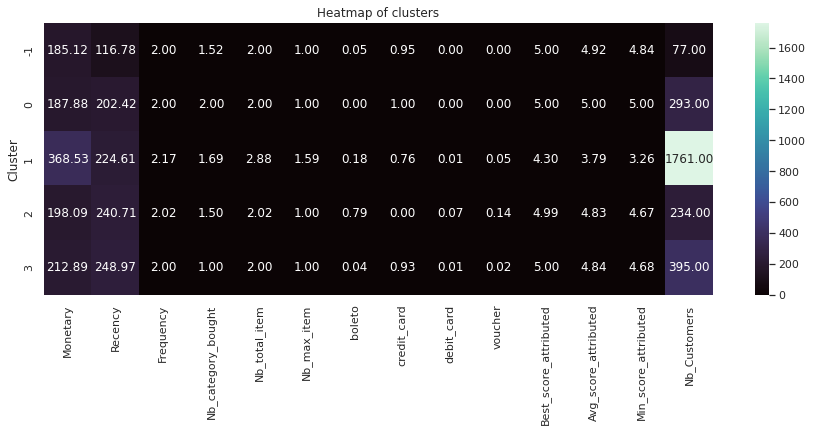

In [ ]:
clust_hdbscan = sev_o.drop(columns='customer_unique_id').assign(Cluster = labels)
cluster_hdbscan_avg = clust_hdbscan.groupby(['Cluster']).mean()
cluster_hdbscan_avg = cluster_hdbscan_avg.assign(Nb_Customers = pd.Series(labels).value_counts())
plt.figure(figsize=(15, 5))
plt.title('Heatmap of clusters')
sns.heatmap(data=cluster_hdbscan_avg, annot=True, fmt='.2f', cmap='mako')
plt.show()

To compare both modelisation we will analyse data intra cluster and choose the most relevant (and easier to explain)

#### Intra cluster analysis

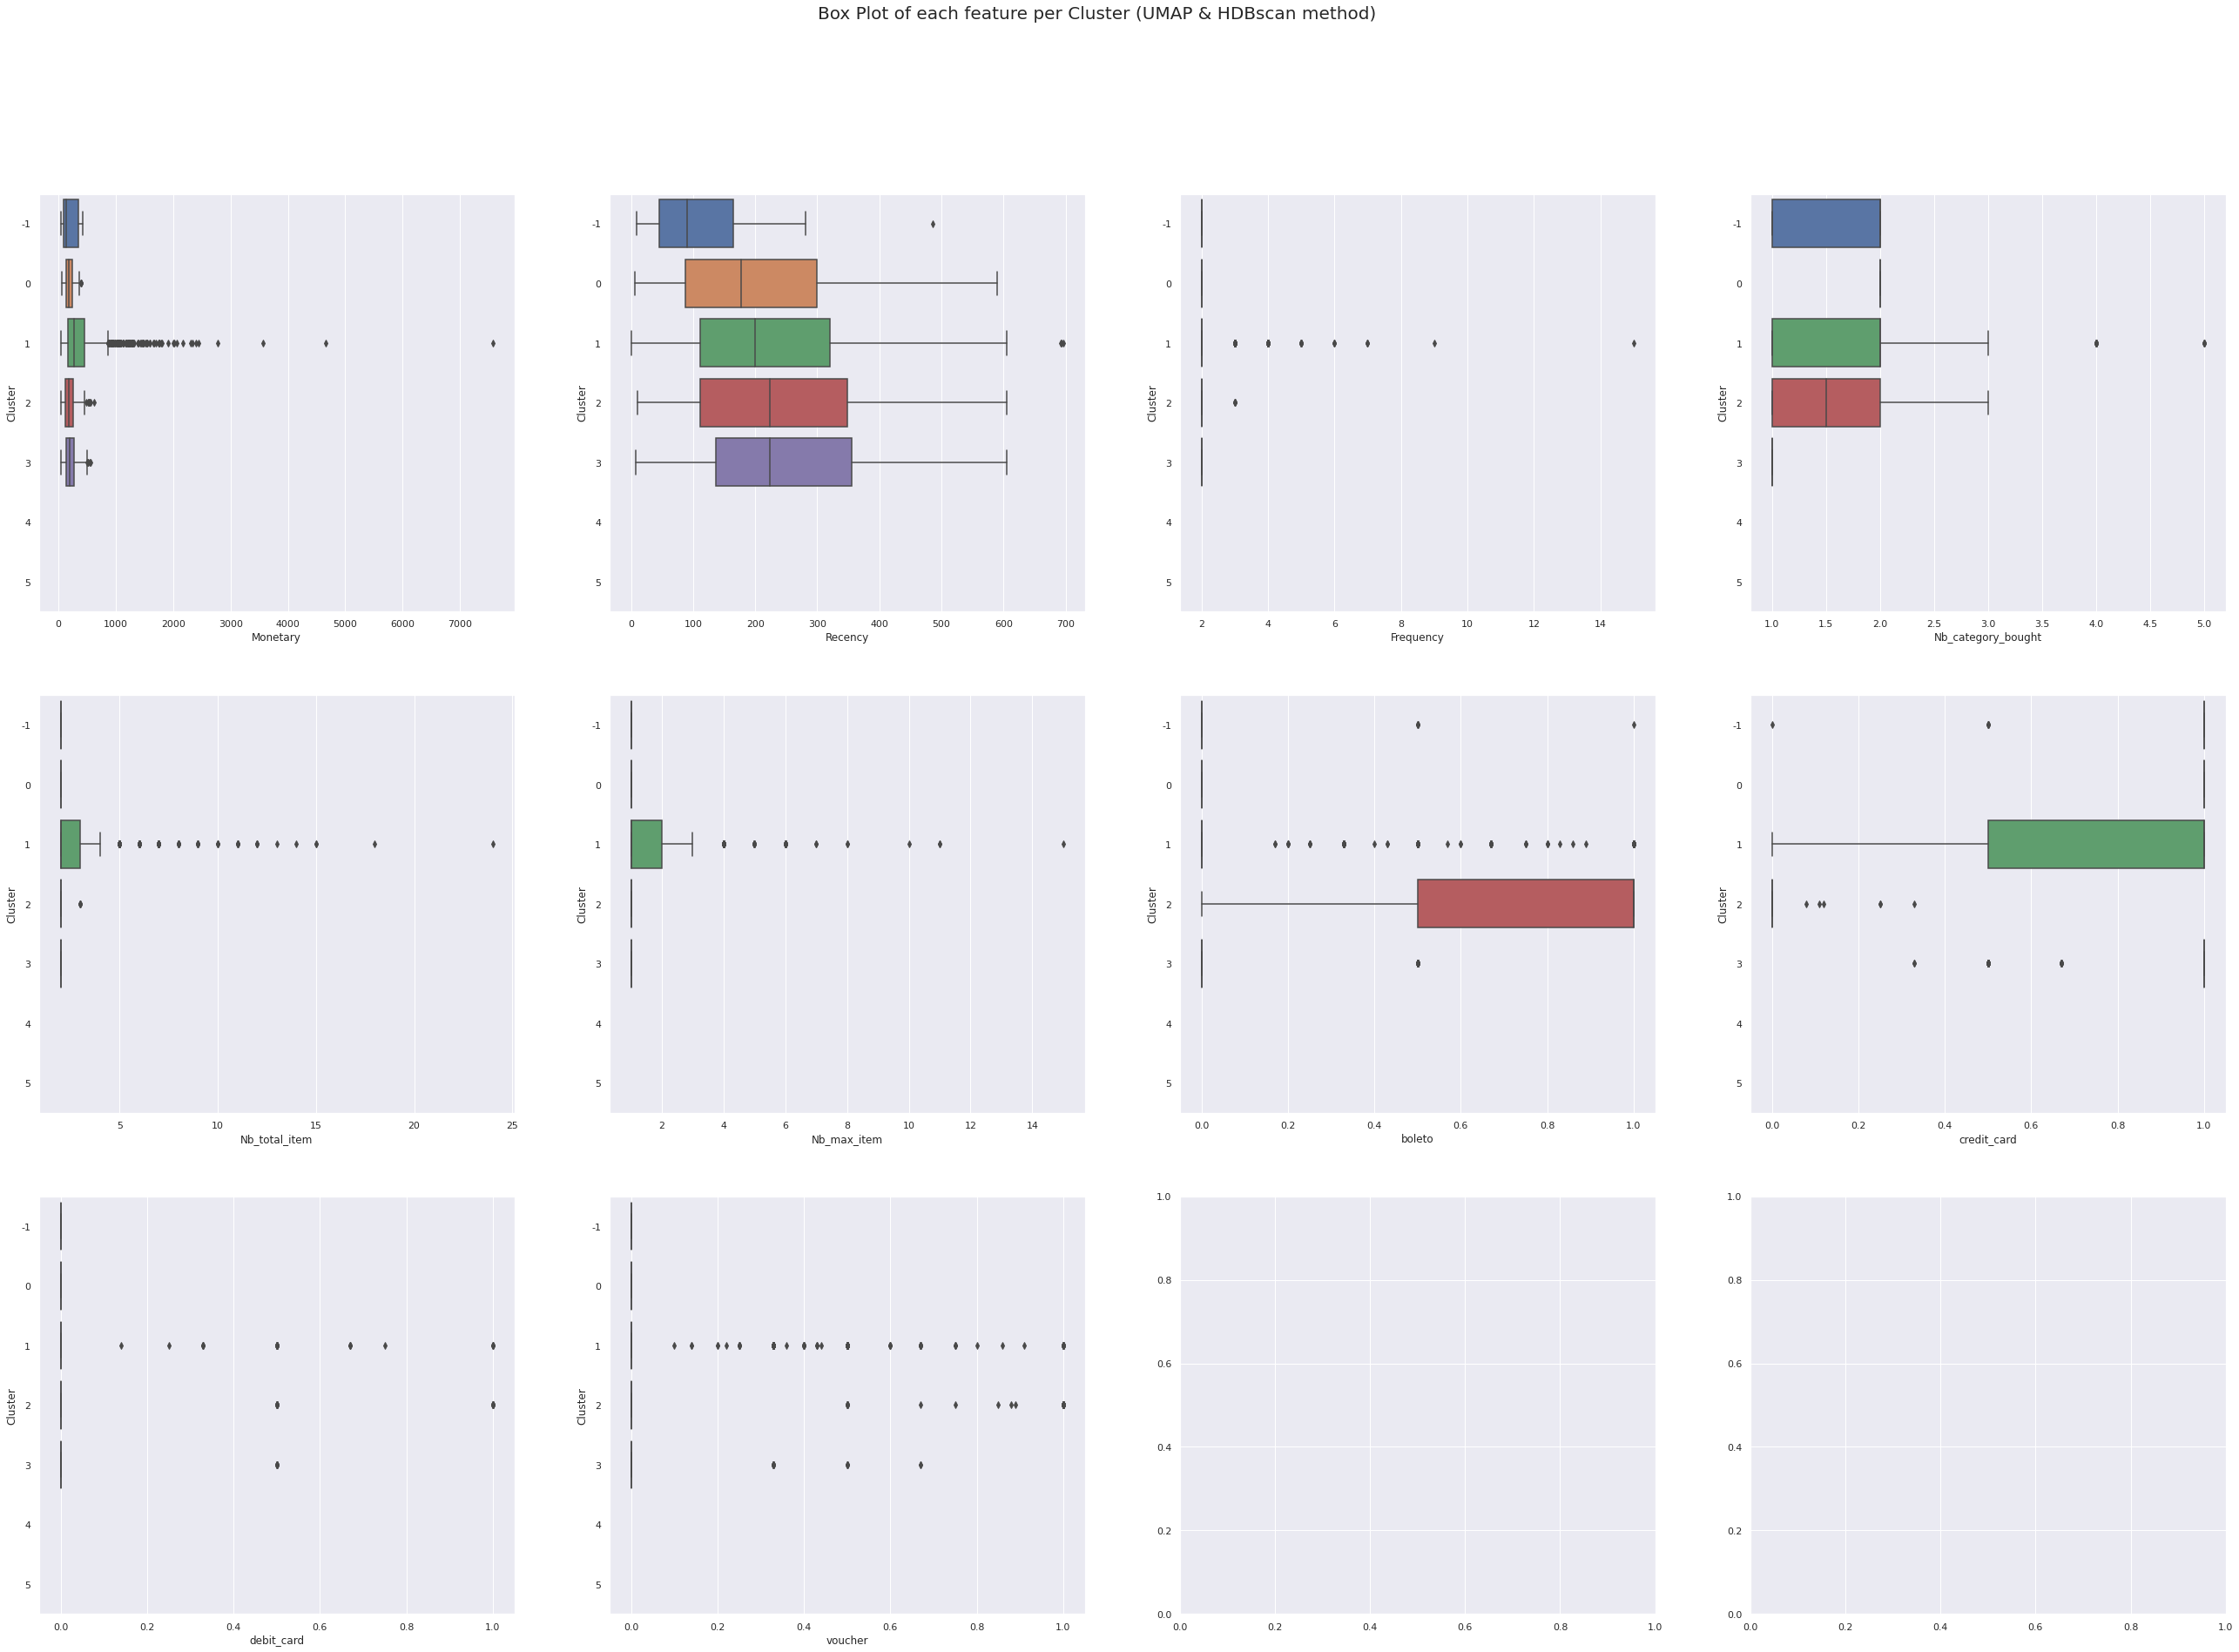

In [ ]:
### UMAP & HDBscan
clust_hdbscan['Cluster']=clust_hdbscan['Cluster'].astype(str)

fig, axes = plt.subplots(3,4,figsize=(45,30))
sns.boxplot(data=clust_hdbscan, x="Monetary", y="Cluster", ax=axes[0,0], order=["-1","0","1","2","3","4","5"])
sns.boxplot(data=clust_hdbscan, x="Recency", y="Cluster", ax=axes[0,1], order=["-1","0","1","2","3","4","5"])
sns.boxplot(data=clust_hdbscan, x="Frequency", y="Cluster", ax=axes[0,2], order=["-1","0","1","2","3","4","5"])
sns.boxplot(data=clust_hdbscan, x="Nb_category_bought", y="Cluster", ax=axes[0,3], order=["-1","0","1","2","3","4","5"])
sns.boxplot(data=clust_hdbscan, x="Nb_total_item", y="Cluster", ax=axes[1,0], order=["-1","0","1","2","3","4","5"])
sns.boxplot(data=clust_hdbscan, x="Nb_max_item", y="Cluster", ax=axes[1,1], order=["-1","0","1","2","3","4","5"])
sns.boxplot(data=clust_hdbscan, x="boleto", y="Cluster", ax=axes[1,2], order=["-1","0","1","2","3","4","5"])
sns.boxplot(data=clust_hdbscan, x="credit_card", y="Cluster", ax=axes[1,3], order=["-1","0","1","2","3","4","5"])
sns.boxplot(data=clust_hdbscan, x="debit_card", y="Cluster", ax=axes[2,0], order=["-1","0","1","2","3","4","5"])
sns.boxplot(data=clust_hdbscan, x="voucher", y="Cluster", ax=axes[2,1], order=["-1","0","1","2","3","4","5"])

plt.suptitle("Box Plot of each feature per Cluster (UMAP & HDBscan method)", fontsize=20)
plt.show()

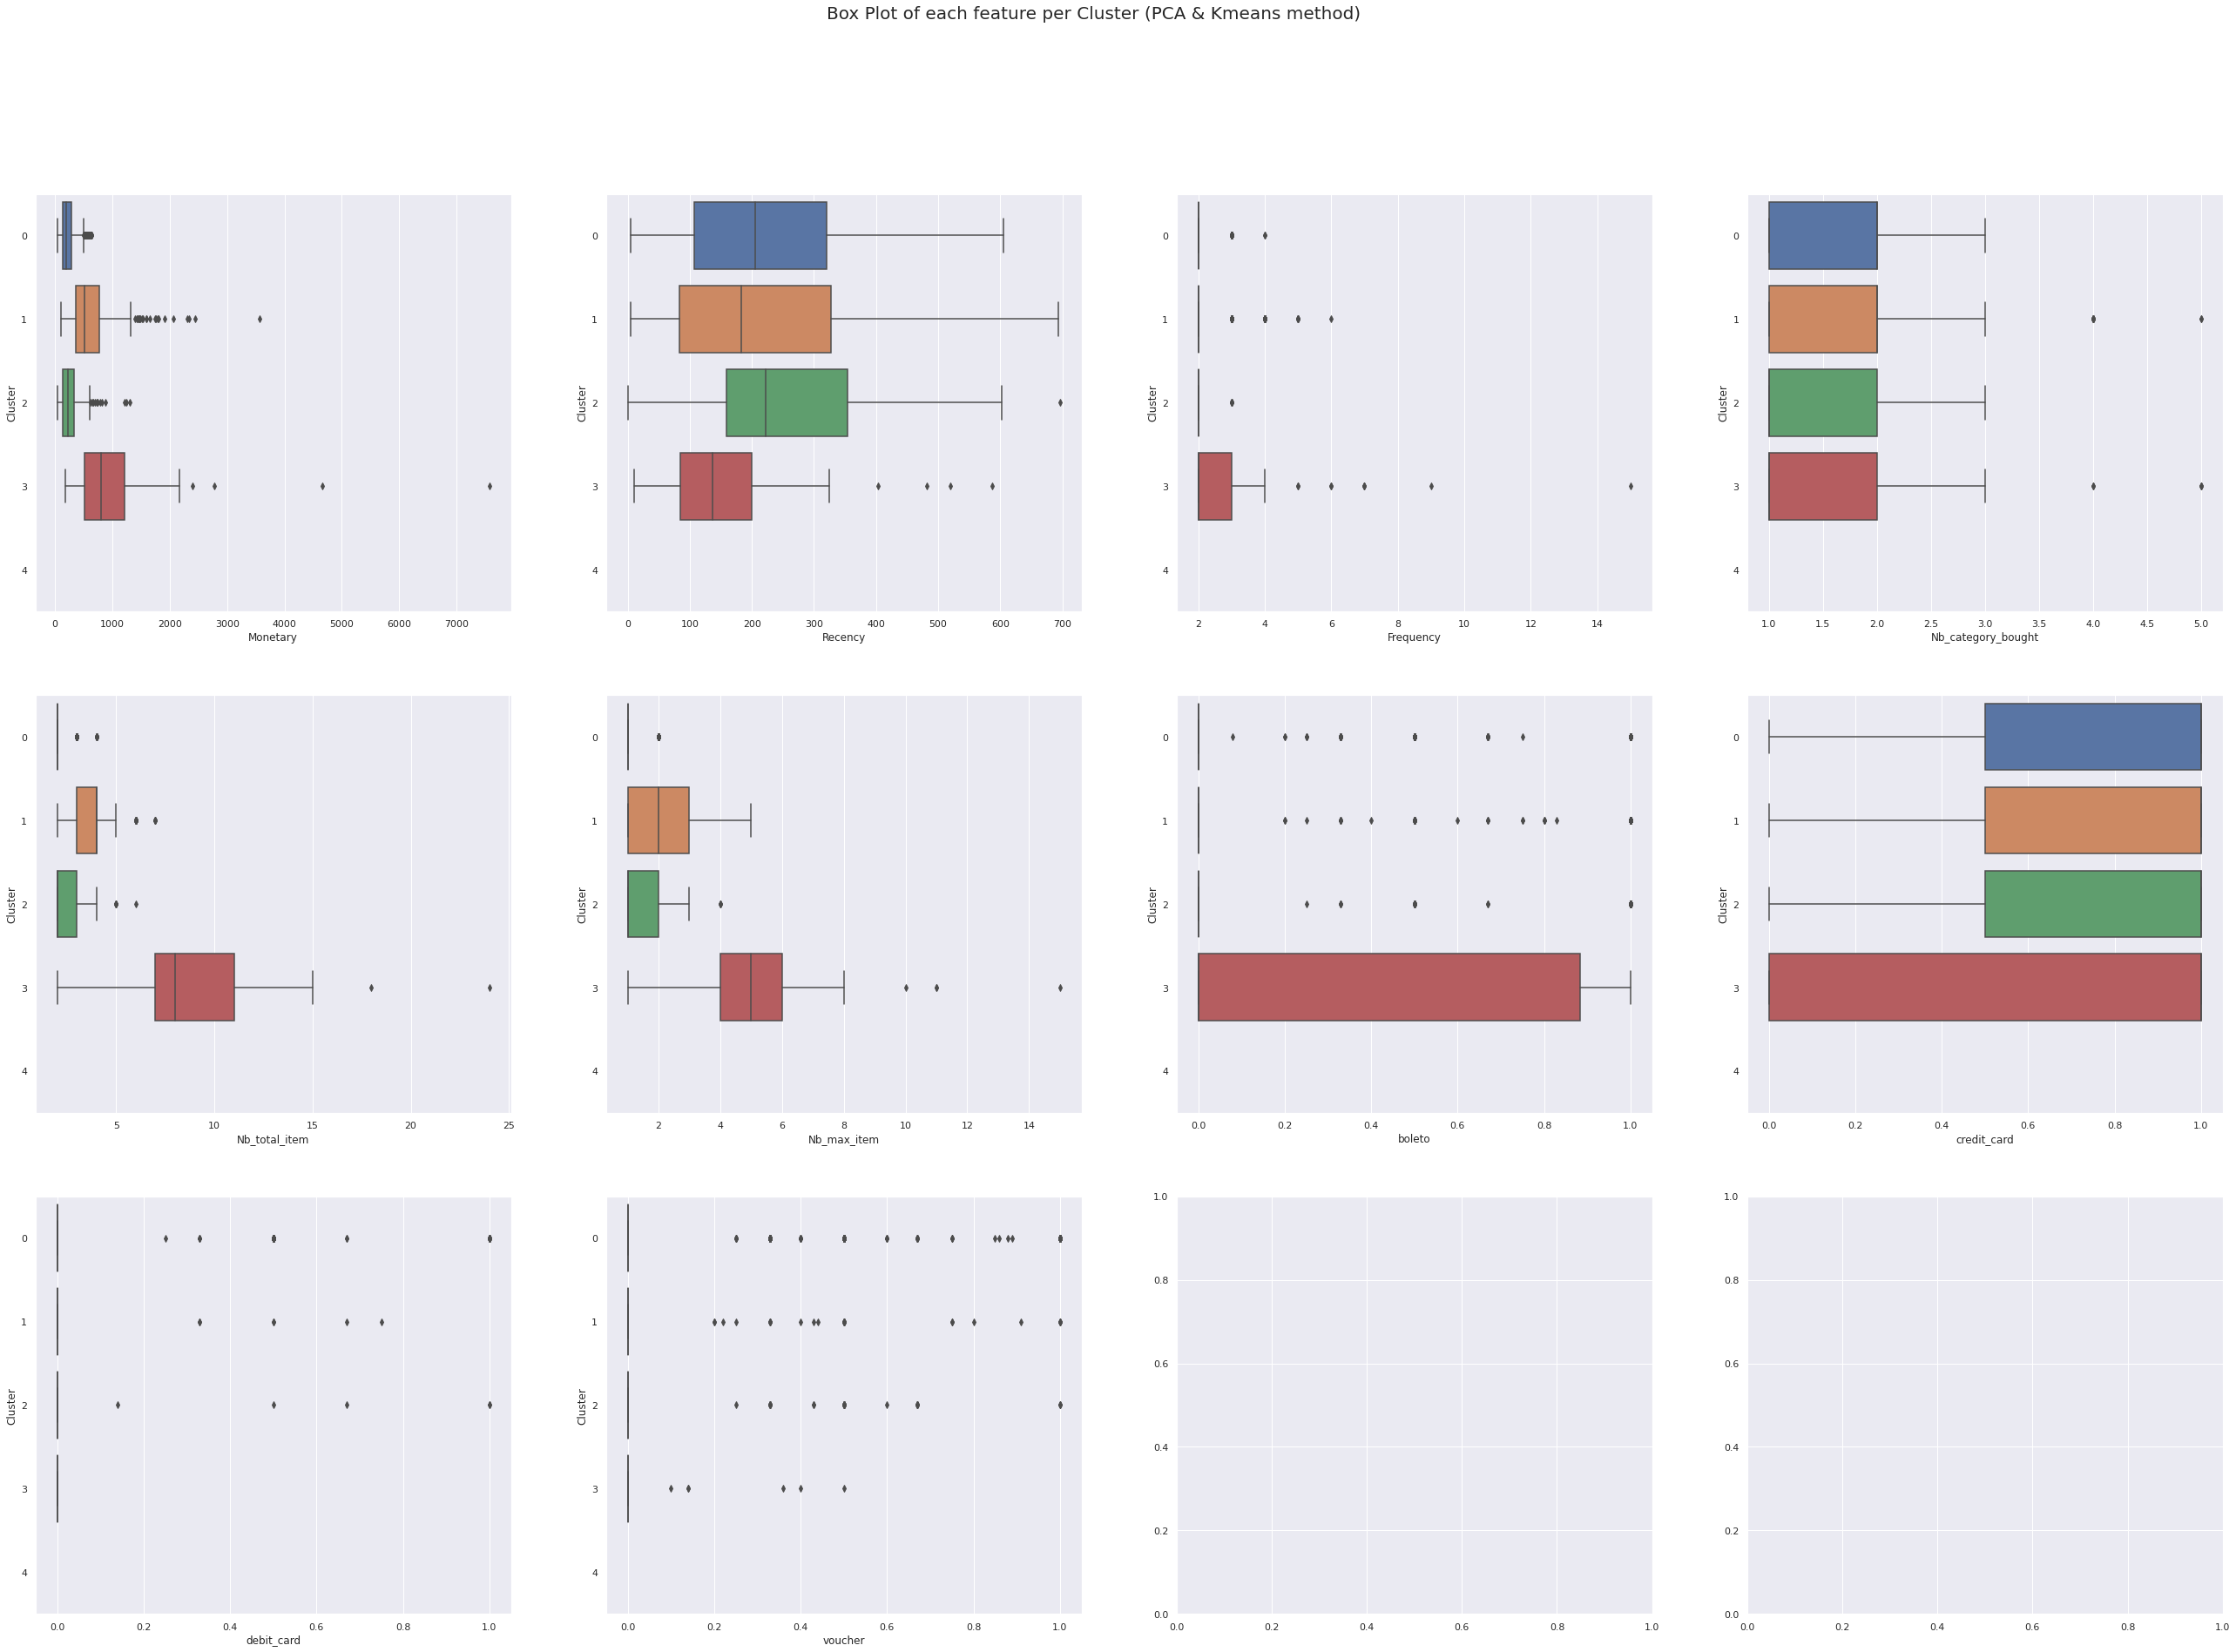

In [ ]:
### PCA & Kmeans

clust_pca['Cluster']=clust_pca['Cluster'].astype(str)

fig, axes = plt.subplots(3,4,figsize=(45,30))
sns.boxplot(data=clust_pca, x="Monetary", y="Cluster", ax=axes[0,0], order=["0","1","2","3","4"])
sns.boxplot(data=clust_pca, x="Recency", y="Cluster", ax=axes[0,1], order=["0","1","2","3","4"])
sns.boxplot(data=clust_pca, x="Frequency", y="Cluster", ax=axes[0,2], order=["0","1","2","3","4"])
sns.boxplot(data=clust_pca, x="Nb_category_bought", y="Cluster", ax=axes[0,3], order=["0","1","2","3","4"])
sns.boxplot(data=clust_pca, x="Nb_total_item", y="Cluster", ax=axes[1,0], order=["0","1","2","3","4"])
sns.boxplot(data=clust_pca, x="Nb_max_item", y="Cluster", ax=axes[1,1], order=["0","1","2","3","4"])
sns.boxplot(data=clust_pca, x="boleto", y="Cluster", ax=axes[1,2], order=["0","1","2","3","4"])
sns.boxplot(data=clust_pca, x="credit_card", y="Cluster", ax=axes[1,3], order=["0","1","2","3","4"])
sns.boxplot(data=clust_pca, x="debit_card", y="Cluster", ax=axes[2,0], order=["0","1","2","3","4"])
sns.boxplot(data=clust_pca, x="voucher", y="Cluster", ax=axes[2,1], order=["0","1","2","3","4"])

plt.suptitle("Box Plot of each feature per Cluster (PCA & Kmeans method)", fontsize=20)
plt.show()

On 3D plot we see that cluster are well identified in UMAP/HDBscan method, but when we dig in it, clusters doesn't seems to be clearly differenciated. However, in PCA/Kmeans, clusters are well differenciated (centroids) se we will choose this method and compare it to simple RFM/Kmeans

### Final Model

It's time to choose our final model, in one hand we've basic RFM associated to a Kmeans, and in the other we've RFM with added features , PCA and Kmeans.

In [ ]:
### Plot PCA Kmeans with centroids
px.scatter_3d(graph_clust_PCA.append(pd.DataFrame(centroids_pca_kmeans,columns=['FC1', 'FC2', 'FC3']).assign(Cluster = -1), ignore_index=True), x='FC1', y='FC2', z='FC3',
              color='Cluster')

In [ ]:
px.scatter_3d(graph_clust.append(pd.DataFrame(centroids_kmeans,columns=['Monetary', 'Recency', 'Frequency']).assign(Cluster = -1)), x='Recency', y='Frequency', z='Monetary',
              color='Cluster')

Silhouette score of clusters when we add new features and perform a PCA is 0.47 while RFM only is 0.37.
We will choose PCA & KMEANS model as final model.


## Clustering Performance Evaluation (Refresh rate of the model)

Now that we have chosen our model, we have to find the optimal refresh rate of it, for this we will use Adjusted Rand Index score from SKlearn library.

First we will train our model created above on data from 2017 and apply it to 2018 data. By doing that we'll watch over cluster assignation, we need to find at least 80% of ARI score to validate our refresh rate.

In [ ]:
def preparation_df(df) :
  monetary_df=df.groupby(['customer_unique_id', 'order_id', 'payment_sequential'])['payment_value'].unique().reset_index()
  monetary_df['payment_value']=monetary_df['payment_value'].replace('[', '').replace(']', '').astype(float)
  monetary_df=monetary_df.groupby(['customer_unique_id', 'order_id']).agg({'payment_value' : 'sum'}).reset_index()
  monetary_df=monetary_df.groupby('customer_unique_id').agg({'payment_value' : 'sum'}).reset_index()
  monetary_df = monetary_df.rename(columns = {'payment_value' : 'Monetary'})
  last_date = df['order_purchase_timestamp'].max()
  recency_df=df.groupby('customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
  recency_df['Recency']= recency_df['order_purchase_timestamp'].apply(lambda x: (last_date - x).days)
  frequency_df = df.groupby('customer_unique_id', as_index=False)['order_id'].nunique()
  frequency_df = frequency_df.rename(columns={'order_id' : 'Frequency'})
  df_merge = monetary_df.merge(recency_df, on='customer_unique_id', how='inner').drop(columns='order_purchase_timestamp')
  RFM_df = df_merge.merge(frequency, on='customer_unique_id', how='inner')
  unique_prod_df=df.groupby(['customer_unique_id'])['product_category_name_english'].nunique().reset_index().rename(columns={'product_category_name_english':'Nb_category_bought'})
  RFM_df=pd.merge(RFM_df, unique_prod_df, how='inner')
  nb_prod_df=df.groupby(['customer_unique_id', 'order_id'])['order_item_id'].max().reset_index()
  nb_prod_max_df=nb_prod_df.groupby(['customer_unique_id'])['order_item_id'].max().reset_index().rename(columns={'order_item_id':'Nb_max_item'})
  nb_prod_df = nb_prod_df.groupby(['customer_unique_id'])['order_item_id'].sum().reset_index().rename(columns={'order_item_id':'Nb_total_item'})
  trans=pd.merge(nb_prod_df,nb_prod_max_df, how='inner')
  RFM_df=pd.merge(RFM_df, trans, how='inner')
  payment_df=pd.pivot_table(df, index = ['customer_unique_id', 'order_id'], columns='payment_type', values='payment_value', aggfunc='count').fillna(0).reset_index()
  payment_df['Total']= payment_df.sum(axis=1)
  payment_df=payment_df.groupby('customer_unique_id').sum().reset_index()
  payment_df.iloc[:,1:]=payment_df.iloc[:,1:].apply(lambda x:round(x/payment_df['Total'], 2))
  payment_df.drop(columns='Total', inplace=True)
  RFM_df=pd.merge(RFM_df, payment_df, how='inner')
  rws_df=df.groupby(['customer_unique_id', 'review_id'])['review_score'].max().reset_index()
  rws_max_df=rws_df.groupby(['customer_unique_id'])['review_score'].max().reset_index().rename(columns={'review_score':'Best_score_attributed'})
  rws_mean_df=rws_df.groupby(['customer_unique_id'])['review_score'].mean().round(1).reset_index().rename(columns={'review_score':'Avg_score_attributed'})
  rws_min_df=rws_df.groupby(['customer_unique_id'])['review_score'].min().reset_index().rename(columns={'review_score':'Min_score_attributed'})
  trans_rws=pd.merge(rws_max_df,rws_mean_df, how='inner')
  trans_rws=pd.merge(trans_rws,rws_min_df, how='inner')
  RFM_df=pd.merge(RFM_df, trans_rws, how='inner')
  return RFM_df

In [ ]:
print(f"First order in the dataset has been purchased the {primary['order_purchase_timestamp'].min()} and the last one has been purchased the {primary['order_purchase_timestamp'].max()}.")

First order in the dataset has been purchased the 2016-09-04 21:15:19 and the last one has been purchased the 2018-09-03 09:06:57.


I'm preparing first dataframe with value of 2017

In [ ]:
df_2017 = primary.loc[(primary['order_purchase_timestamp'].dt.date < dt.date(2018,1,1))&(primary['order_purchase_timestamp'].dt.date > dt.date(2016,12,31))]
print("Last purchase :",df_2017['order_purchase_timestamp'].max(), "\nFirst purchase :",df_2017['order_purchase_timestamp'].min())

Last purchase : 2017-12-31 23:29:31 
First purchase : 2017-01-05 11:56:06


Now we initialise our model based on 2017

In [ ]:
RFM_2017=preparation_df(df_2017)
RFM_2017=RFM_2017.loc[RFM_2017['Frequency'] > 1]
X_2017=RFM_2017.drop(columns='customer_unique_id').values

In [ ]:
X_2017 = RobustScaler().fit_transform(X_2017)
X_2017 = PCA(n_components=3).fit_transform(X_2017)
model_base = KMeans(n_clusters=4).fit(X_2017)
cluster_base= model_base.predict(X_2017)

Now we will test month per month on 2018 part and plot ARI Score

In [ ]:
time_boundaries=[2,3,4,5,6,7,8,9]
ari_scores={}

for i in time_boundaries :
  df_ari=primary.loc[(primary['order_purchase_timestamp'].dt.date < dt.date(2018,i,1))&(primary['order_purchase_timestamp'].dt.date > dt.date(2016,12,31))]
  df_ari=preparation_df(df_ari)
  df_ari=df_ari.loc[df_ari['Frequency'] > 1]
  X_ari=df_ari.drop(columns='customer_unique_id').values
  X_ari = RobustScaler().fit_transform(X_ari)
  X_ari = PCA(n_components=3).fit_transform(X_ari)
  model_ari = KMeans(n_clusters=4).fit(X_ari)
  ari_pred=model_base.predict(X_ari)
  scoring=adjusted_rand_score(model_ari.labels_, ari_pred)
  ari_scores[str(dt.date(2018,i,1))]=scoring

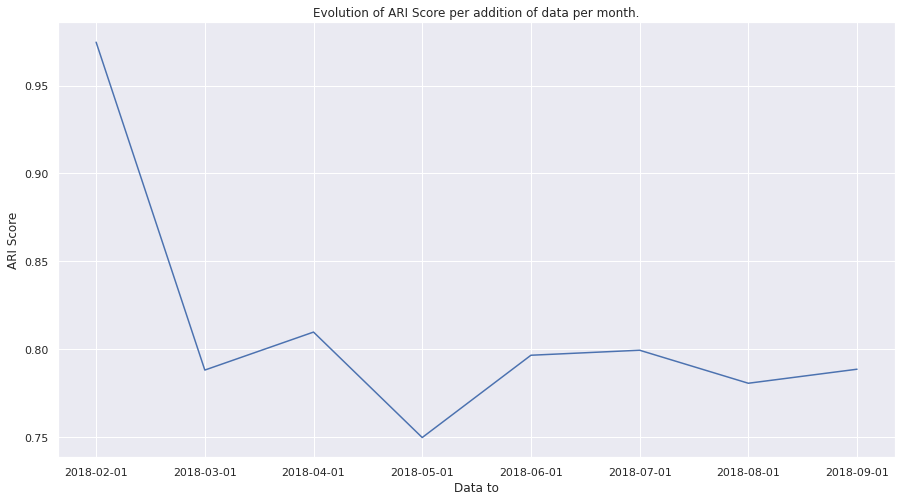

In [ ]:
df_scores=pd.DataFrame.from_dict(ari_scores, orient='index', columns=['ARI Score']).reset_index().rename(columns = {'index' : 'Data to'})

plt.figure(figsize=(15,8))
sns.lineplot(x="Data to", y="ARI Score",data=df_scores)
plt.title("Evolution of ARI Score per addition of data per month.")
plt.show()

As we can see here, ARI Score goes up till 0.83 after 3 months so i recommend
to update the model every 3 months.

# Bonus : Testing how the model performs on whole customers

In [ ]:
### Testing if the model works well with every clients (not only those with more than 2 orders)

RFM_2017=preparation_df(df_2017)
X_2017=RFM_2017.drop(columns='customer_unique_id').values
X_2017_n = RobustScaler().fit_transform(X_2017)
pca_test=PCA(n_components=3).fit(X_2017_n)
X_2017_n = pca_test.transform(X_2017_n)
model_base = KMeans(n_clusters=4).fit(X_2017_n)
cluster_base= model_base.predict(X_2017_n)
test_viz = pd.DataFrame(X_2017_n,columns = ['FC1', 'FC2', 'FC3']).assign(Cluster = model_base.labels_)
fig = px.scatter_3d(test_viz, x='FC1', y='FC2', z='FC3',
              color='Cluster')
fig.show()

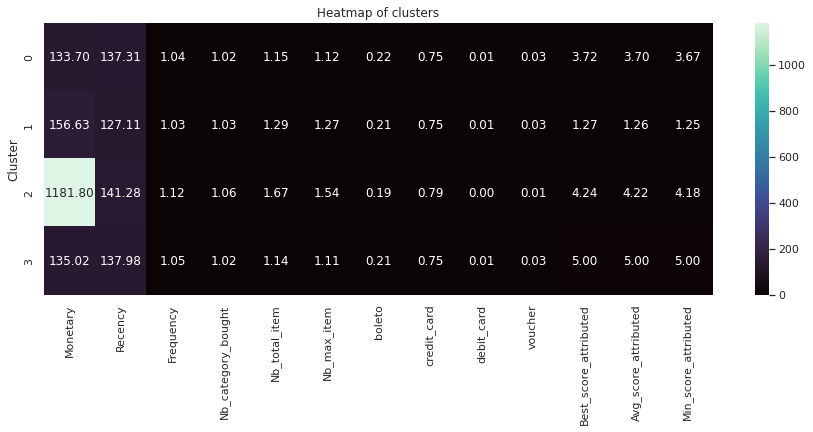

In [ ]:
test_heat = RFM_2017.drop(columns='customer_unique_id').assign(Cluster = model_base.labels_)
test_heat = test_heat.groupby(['Cluster']).mean()
plt.figure(figsize=(15, 5))
plt.title('Heatmap of clusters')
sns.heatmap(data=test_heat, annot=True, fmt='.2f', cmap='mako')
plt.show()

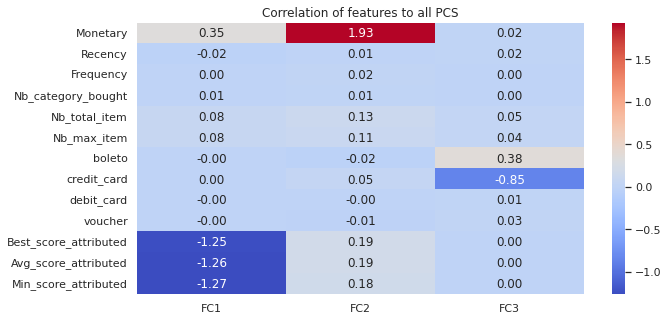

In [ ]:
loadings = pca_test.components_.T * np.sqrt(pca_test.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['FC1', 'FC2', 'FC3'], index=RFM_2017.drop(columns='customer_unique_id').columns)

plt.figure(figsize=(10, 5))
plt.title('Correlation of features to all PCS')
sns.heatmap(data=loading_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Here we can see that PC1 is negatively correlated to customer satisfaction while PC2 is correlated to Monetary and PC3 to payment type.

We can say that using the model previously build on customers with more than 1 order doesn't give a good result when we look at heatmap, this could be improved maybe by having more clusters because when we look at FC correlation, it is interesting how each FC is correlated to a specific feature.